In [5]:
pip install wordcloud

     |████████████████████████████████| 173 kB 5.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import nltk
import unicodedata
import re
from nltk.corpus import stopwords
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
aus = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\Results\\Aus.csv") # These are the csv files of corresponding countries tweets and their predicted sentiments
ind = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\Results\\In.csv")
indo = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\Results\\Indo.csv")
jap = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\Results\\Jap.csv")
br = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\Results\\Br.csv")
uk = pd.read_csv("D:\\Sinophobia Sentiment Analysis\\Results\\UK.csv")

In [4]:
aus['country'] = 'Australia'
ind['country'] = 'India'
indo['country'] = 'Indonesia'
jap['country'] = 'Japan'
br['country'] = 'Brazil'
uk['country'] = 'UK'

In [5]:
aus.columns

Index(['Unnamed: 0', 'Tweet', 'text', 'date', 'Optimistic', 'Thankful',
       'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial',
       'Official report', 'Joking', 'country'],
      dtype='object')

In [6]:
ind = ind.drop(columns=['Unnamed: 0'],axis=1)
indo = indo.drop(columns=['Unnamed: 0'],axis=1)
aus = aus.drop(columns=['Unnamed: 0'],axis=1)
jap = jap.drop(columns=['Unnamed: 0'],axis=1)
br = br.drop(columns=['Unnamed: 0'],axis=1)
uk = uk.drop(columns=['Unnamed: 0'],axis=1)

In [7]:
df1 = pd.concat([aus,ind], axis=0)
df2 = pd.concat([df1,indo], axis=0)
df3 = pd.concat([df2,br], axis=0)
df4 = pd.concat([df3,jap], axis=0)
Combined_data = pd.concat([df4,uk], axis=0)

In [8]:
Combined_data = Combined_data.reset_index()
Combined_data

index                                              Tweet  \
0            0  china’s  yuan advanced to the strongest level ...   
1            1  retweet  physician’s agency funded china’s bat...   
2            2  retweet  tim pool  mocks canada’s authoritaria...   
3            3   and yet china has yet to apologise for this f...   
4            4  bbc news   coronavirus  vaccines should work a...   
...        ...                                                ...   
268020  164794  usps chief louis dejoy says he will not restor...   
268021  164795  usps chief louis dejoy says he will not restor...   
268022  164796  retweet  ⁣the inaugural helsinki biennial will...   
268023  164797  retweet  episode 117   if we cannot use the cl...   
268024  164798  retweet  ‘they do not want hongkongers’ – how ...   

                                                     text  \
0       China’s #yuan advanced to the strongest level ...   
1       RT @jsolomonReports: Fauci’s agency funded Chi...   
2       RT @TPostMillennial: Tim Pool @Timcast mocks C...   
3       @globaltimesnews And yet China has yet to apol...   
4       BBC News - Covid: Vaccines should work against...   
...                                                   ...   
268020  USPS chief Louis DeJoy says he won't restore m...   
268021  USPS chief Louis DeJoy says he won't restore m...   
268022  RT @HELbiennial: ⁣The inaugural Helsinki Bienn...   
268023  RT @PodGeeked: Episode 117: "If we can’t use t...   
268024  RT @SCMPNews: ‘They don’t want Hongkongers’ – ...   

                                  date  Optimistic  Thankful  Empathetic  \
0       Wed Dec 08 04:26:39 +0000 2021           0         0           0   
1       Wed Dec 08 04:30:07 +0000 2021           0         0           0   
2       Wed Dec 08 04:45:21 +0000 2021           0         0           0   
3       Wed Dec 08 04:49:55 +0000 2021           0         0           0   
4       Wed Dec 08 04:56:32 +0000 2021           0         0           0   
...                                ...         ...       ...         ...   
268020  Fri Aug 21 16:57:32 +0000 2020           0         0           0   
268021  Fri Aug 21 20:18:03 +0000 2020           0         0           0   
268022  Wed Apr 07 08:26:45 +0000 2021           1         0           0   
268023  Fri Nov 19 13:47:52 +0000 2021           0         0           0   
268024             1314507449282555904           0         0           0   

        Pessimistic  Anxious  Sad  Annoyed  Denial  Official report  Joking  \
0                 0        0    0        0       0                1       0   
1                 0        0    0        0       1                1       0   
2                 0        0    0        0       0                0       1   
3                 0        0    0        1       1                0       0   
4                 0        0    0        1       1                0       0   
...             ...      ...  ...      ...     ...              ...     ...   
268020            0        0    0        1       0                1       0   
268021            0        0    0        0       0                1       0   
268022            0        0    0        0       0                1       0   
268023            0        0    0        1       0                0       1   
268024            0        1    0        1       0                0       0   

          country  
0       Australia  
1       Australia  
2       Australia  
3       Australia  
4       Australia  
...           ...  
268020         UK  
268021         UK  
268022         UK  
268023         UK  
268024         UK  

[268025 rows x 15 columns]

In [9]:
Combined_data = Combined_data.drop(columns=['index'],axis=1)

In [14]:
data = Combined_data.copy()

In [15]:
data['date'] = pd.to_datetime(data['date'], format='%a %b %d %H:%M:%S +0000 %Y',errors='coerce')
data = data.dropna(subset=['date'])
data['date'] = data['date'].dt.tz_localize('UTC').dt.tz_convert(None)
data['month'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m')

In [16]:
dates = data['month'].unique()
df = data.copy()
dates

array(['2021-12', '2022-01', '2021-11', '2021-09', '2021-08', '2021-10',
       '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
       '2020-10', '2020-12', '2021-01', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08'], dtype=object)

In [17]:
data.columns

Index(['Tweet', 'text', 'date', 'Optimistic', 'Thankful', 'Empathetic',
       'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Official report',
       'Joking', 'country', 'month'],
      dtype='object')

In [28]:
df

Tweet  \
0       china’s  yuan advanced to the strongest level ...   
1       retweet  physician’s agency funded china’s bat...   
2       retweet  tim pool  mocks canada’s authoritaria...   
3        and yet china has yet to apologise for this f...   
4       bbc news   coronavirus  vaccines should work a...   
...                                                   ...   
268019  fascism 101  usps chief louis dejoy says he wi...   
268020  usps chief louis dejoy says he will not restor...   
268021  usps chief louis dejoy says he will not restor...   
268022  retweet  ⁣the inaugural helsinki biennial will...   
268023  retweet  episode 117   if we cannot use the cl...   

                                                     text                date  \
0       China’s #yuan advanced to the strongest level ... 2021-12-08 04:26:39   
1       RT @jsolomonReports: Fauci’s agency funded Chi... 2021-12-08 04:30:07   
2       RT @TPostMillennial: Tim Pool @Timcast mocks C... 2021-12-08 04:45:21   
3       @globaltimesnews And yet China has yet to apol... 2021-12-08 04:49:55   
4       BBC News - Covid: Vaccines should work against... 2021-12-08 04:56:32   
...                                                   ...                 ...   
268019  Fascism 101: USPS chief Louis DeJoy says he wo... 2020-08-21 16:28:19   
268020  USPS chief Louis DeJoy says he won't restore m... 2020-08-21 16:57:32   
268021  USPS chief Louis DeJoy says he won't restore m... 2020-08-21 20:18:03   
268022  RT @HELbiennial: ⁣The inaugural Helsinki Bienn... 2021-04-07 08:26:45   
268023  RT @PodGeeked: Episode 117: "If we can’t use t... 2021-11-19 13:47:52   

        Optimistic  Thankful  Empathetic  Pessimistic  Anxious  Sad  Annoyed  \
0                0         0           0            0        0    0        0   
1                0         0           0            0        0    0        0   
2                0         0           0            0        0    0        0   
3                0         0           0            0        0    0        1   
4                0         0           0            0        0    0        1   
...            ...       ...         ...          ...      ...  ...      ...   
268019           0         0           0            0        0    0        1   
268020           0         0           0            0        0    0        1   
268021           0         0           0            0        0    0        0   
268022           1         0           0            0        0    0        0   
268023           0         0           0            0        0    0        1   

        Denial  Official report  Joking    country    month  
0            0                1       0  Australia  2021-12  
1            1                1       0  Australia  2021-12  
2            0                0       1  Australia  2021-12  
3            1                0       0  Australia  2021-12  
4            1                0       0  Australia  2021-12  
...        ...              ...     ...        ...      ...  
268019       0                1       0         UK  2020-08  
268020       0                1       0         UK  2020-08  
268021       0                1       0         UK  2020-08  
268022       0                1       0         UK  2021-04  
268023       0                0       1         UK  2021-11  

[244731 rows x 15 columns]

In [14]:
data.to_csv("D:\\Sinophobia Sentiment Analysis\\Results\\Aus.csv")

# Some stats of the whole data

### Plot to to get number of Sinophobia related tweets per country

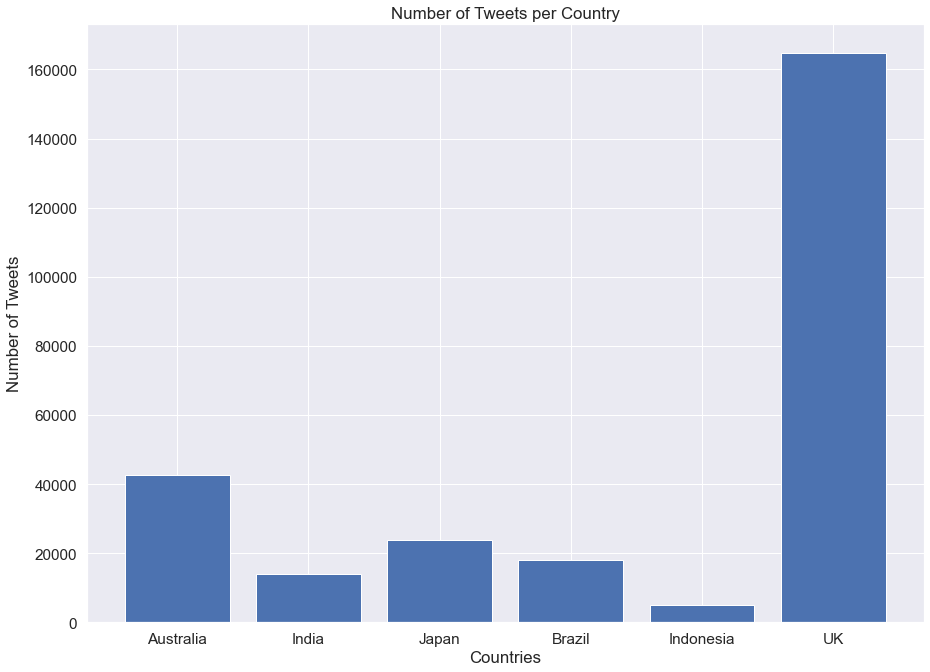

In [59]:
countries = ['Australia', 'India', 'Japan', 'Brazil', 'Indonesia', 'UK']
tweet_counts = [len(aus), len(ind), len(jap), len(br), len(indo), len(uk)]   # Tweet counts of vaccine related tweets

plt.figure(figsize = (15, 11))

# Plotting the bar graph
plt.bar(countries, tweet_counts)

# Customizing the graph
plt.xlabel('Countries')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Country')

# Displaying the graph
plt.show()

### Counts of tweets that contain given sentiment

Text(0.5, 0, 'Count')

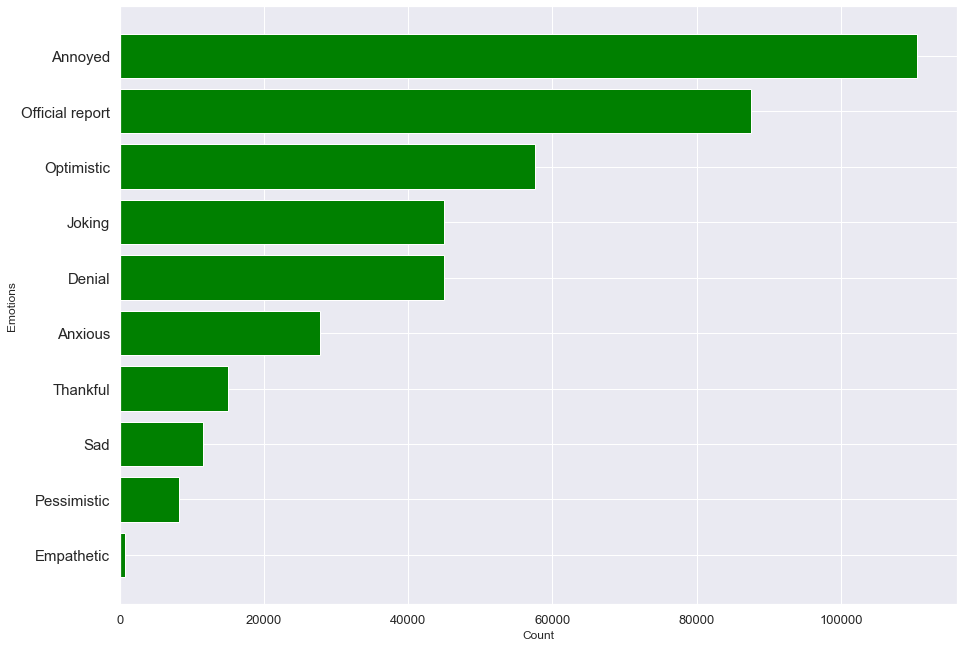

In [50]:
emotions = list(Combined_data.columns[3:13])
scores = [sum(Combined_data[x]) for x in emotions]
pairs = []

for i in range(len(emotions)):
    pairs.append((emotions[i], scores[i]))

pairs = sorted(pairs, key = lambda x : x[1], reverse = False)
emotions_sorted = []
scores_sorted = []

for pair in pairs:
    emotions_sorted.append(pair[0])
    scores_sorted.append(pair[1])

plt.figure(figsize = (15, 11))
plt.barh(emotions_sorted, scores_sorted, color = 'green')
plt.yticks(fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel("Emotions")
plt.xlabel("Count")

### Counts of labels of tweets

In [37]:
data = Combined_data.copy()

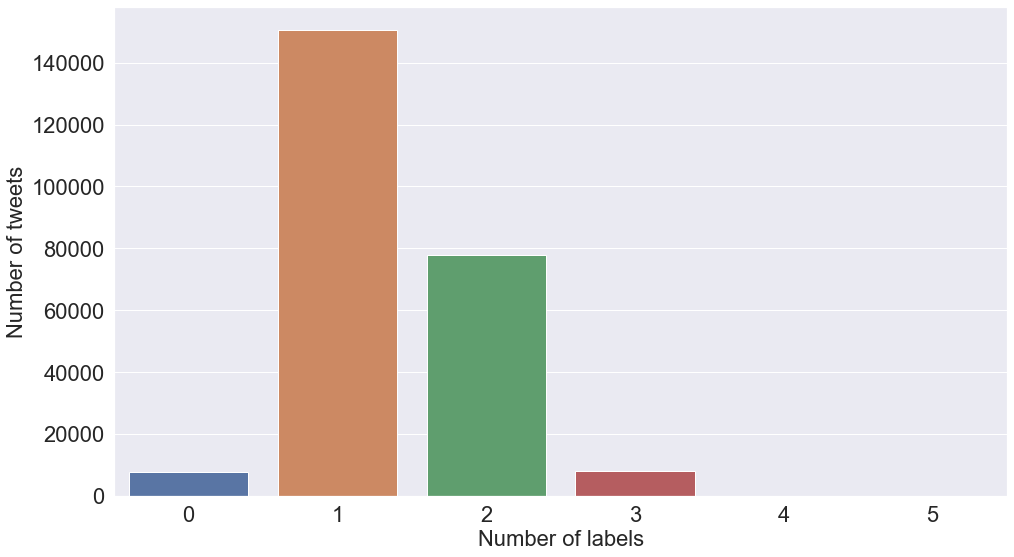

In [56]:
data['n_emotions'] = data['Optimistic'] + data['Thankful'] + data['Empathetic'] + data['Pessimistic'] + data['Anxious'] + data['Sad'] + data['Annoyed'] + \
                        data['Official report'] + data['Joking']
rowSums = data['n_emotions']
multiLabel_counts = rowSums.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize = (16, 9))

ax = sns.barplot(x=multiLabel_counts.index, y=multiLabel_counts.values, orient = 'v')

#plt.title("Tweets having multiple labels")
plt.ylabel('Number of tweets', fontsize = 22)
plt.xlabel('Number of labels', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### Percentage distribution of sentiments in all countries

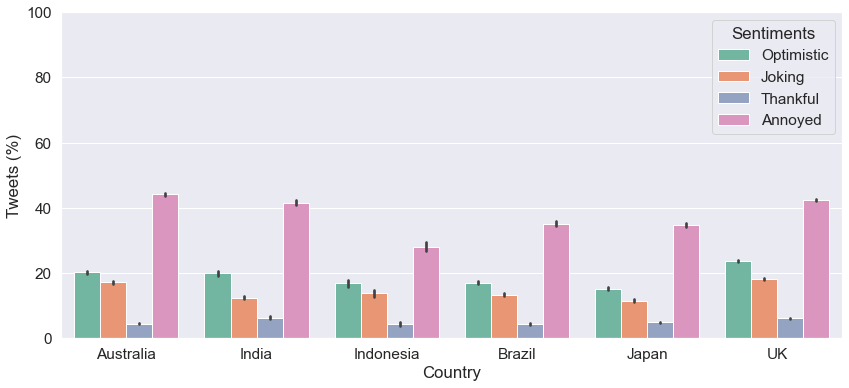

In [57]:
plt.figure(figsize = (14, 6))
sns.set(font_scale=1.4)
melted_data = pd.melt(data, id_vars='country', value_vars=['Optimistic', 'Joking', 'Thankful','Annoyed'])
melted_data['value'] = melted_data['value'] * 100
melted_data.rename(columns={'variable':'Sentiments'}, inplace=True)
ax = sns.barplot(x='country', y='value', hue='Sentiments',data=melted_data, palette='Set2')
plt.ylabel('Tweets (%)')
plt.ylim(0, 100)
plt.xlabel('Country')
plt.show()

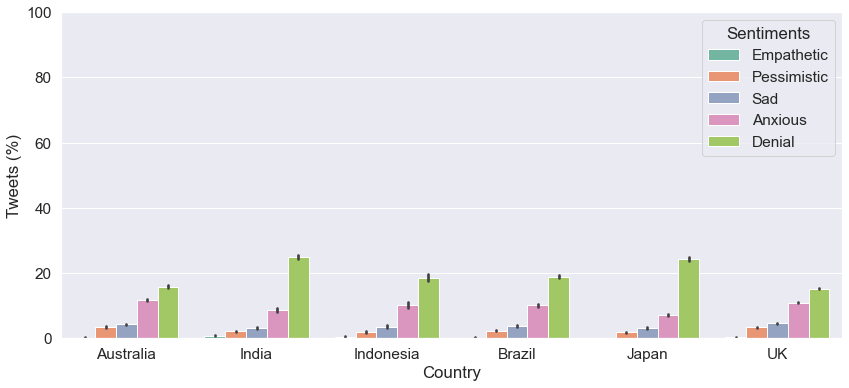

In [58]:
plt.figure(figsize = (14, 6))
sns.set(font_scale=1.4)
melted_data = pd.melt(data, id_vars='country', value_vars=['Empathetic', 'Pessimistic', 'Sad','Anxious','Denial'])
melted_data['value'] = melted_data['value'] * 100
melted_data.rename(columns={'variable':'Sentiments'}, inplace=True)
ax = sns.barplot(x='country', y='value', hue='Sentiments', data=melted_data, palette='Set2')
plt.ylabel('Tweets (%)')
plt.ylim(0, 100)
plt.xlabel('Country')
plt.show()


### Tweet counts variation over months

In [48]:
grouped = data.groupby(['month', 'country'])['Tweet'].count().reset_index()
grouped.columns = ['Month', 'Country', 'Number of Tweets']

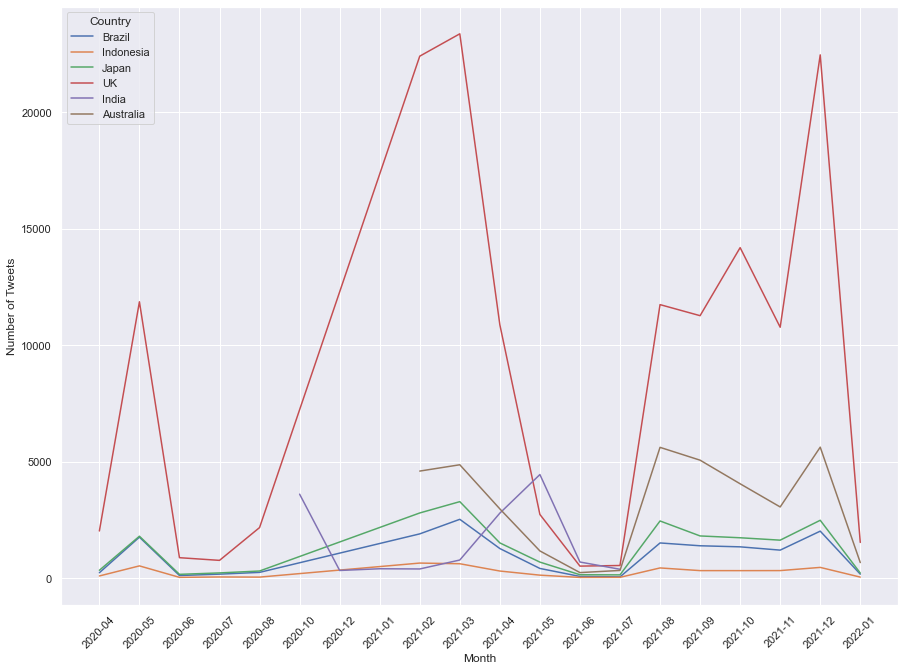

In [60]:
plt.figure(figsize=(15,11))
sns.set(style="darkgrid")
sns.lineplot(x="Month", y="Number of Tweets", hue="Country", data=grouped)
plt.xticks(rotation=45)
plt.show()

# ngrams

In [24]:
def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()

    stop_words = set(stopwords.words('english'))


    extra_stop_words = ['ali', 'article', 'bad', 'belt', 'berkeley', 'black', 'boris', 'bush', 'came', 'california', 'can', 'click','chancellor', 'china', 'chinese', 'climate', 'com', 'come', 'comes', 'coming', 'considered', 'court', 'department', 'dutton', 'daryl', 'eve', 'email', 'england', 'every', 'four','federal', 'fossil', 'fuel', 'george', 'go', 'going', 'good',  'green', 'guardian','letter','letters', 'industry', 'including', 'important', 'isle', 'islander', 'johnson', 'just', 'kensington', 'know', 'known', 'leader', 'leyen', 'ltd', 'like', 'look', 'looking', 'looks', 'labor', 'mohammed', 'made', 'make', 'makes', 'malik', 'many', 'may', 'meal', 'matt', 'might', 'minister', 'months', 'morning','morrison', 'national', 'need', 'needed', 'number', 'numbers', 'observer', 'office', 'one','publish', 'places', 'place', 'please', 'point','priti','patel', 'pty', 'points', 'police', 'president', 'prime', 'prosecution', 'papua', 'pompeo', 'paulo', 'rapporteur', 'received','radio', 'read', 'receive', 'report', 'said', 'says', 'scott','story','stories', 'school', 'secretary', 'seeing', 'seen', 'sign', 'state', 'story', 'street', 'strait', 'supreme', 'sunak', 'sacoolas', 'take', 'takes', 'tell', 'tells', 'think', 'thinks', 'thought', 'time', 'times', 'today', 'top', 'told', 'torres', 'trump', 'uk', 'united', 'university', 'upload','use', 'used', 'using', 'wales', 'want', 'wants', 'way', 'ways', 'week', 'work', 'worked', 'world', 'wagga', 'you', 'york', 'young', 'zealand','grey','hunt','josh','deniel','andrews','north','aged','western','robertssmith','well','murder','war','anthony','alex','besanko','youve','mustreads','inbox','mail','would','roy','mp','berejiklian']

    stop_words.update(extra_stop_words)

    text = (unicodedata.normalize('NFKD', text)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    words = re.sub(r'[^\w\s]', '', text).split()

    # 对于带撇号的单词，去掉撇号后再判断是否在停用词表中
    words = [word if "'" not in word else word.split("'")[0] for word in words]
    return [wnl.lemmatize(word) for word in words if word not in stop_words]

In [30]:
def extract_specific_quarter_data(df, start_date, end_date):
    """
    Extract data from the DataFrame for the specified date range.

    Args:
    - df: DataFrame to extract data from
    - start_date: Start date of the date range (format: 'YYYY-MM-DD')
    - end_date: End date of the date range (format: 'YYYY-MM-DD')

    Returns:
    - DataFrame containing data for the specified date range
    """
    # Convert start_date and end_date to datetime objects
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Extract data for the specified date range
    return df[(df['date'] >= start_date) & (df['date'] <= end_date)]

In [33]:
def plot_ngrams_for_dataset1(data, dataset_name, start_date, end_date, n=[2], top=15, colors=('#00429d', '#ffa600')):
    # Extract data for the specified date range
    quarterly_data = extract_specific_quarter_data(data, start_date, end_date)

    # Clean the data
    quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)
    cleaned_data = clean(''.join(quarterly_data['Tweet']))

    for i, n_val in enumerate(n):
        plt.figure(figsize=(15, 8))  
        ax = plt.subplot()  

        
        ngrams_series = pd.Series(nltk.ngrams(cleaned_data, n_val)).value_counts()[:top]
        ngrams_series.sort_values().plot.barh(color=colors[i % len(colors)], width=0.5, ax=ax)

        ax.tick_params(axis='x', labelsize=20)
        ax.tick_params(axis='y', labelsize=22, rotation=45)

        plt.show()  

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


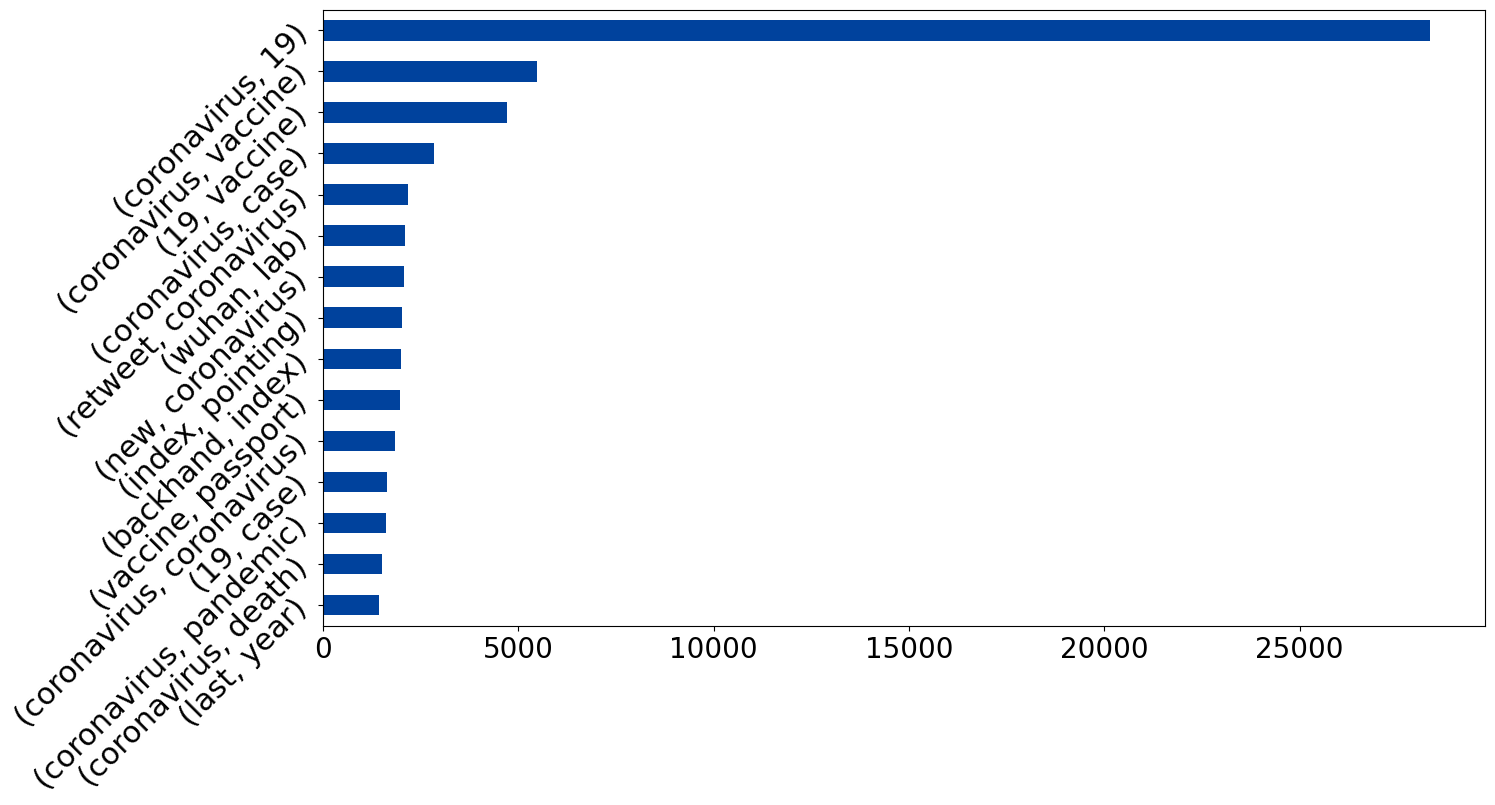

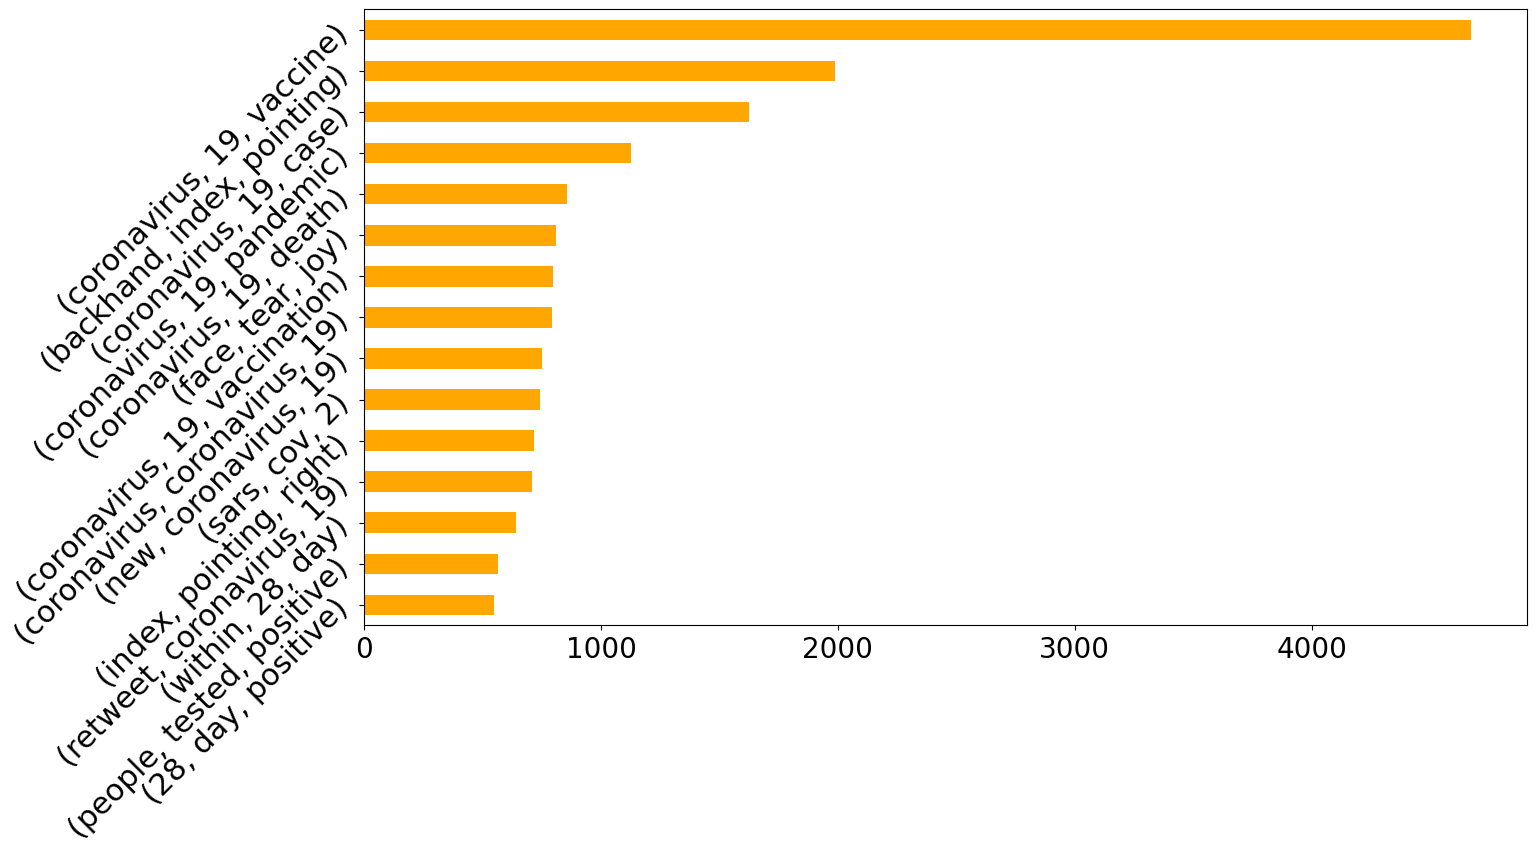

In [34]:
start_date = '2021-01-01'
end_date = '2021-12-31'
plot_ngrams_for_dataset1(df, 'Overall Dataset', start_date, end_date, n=[2, 3], top=15)

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


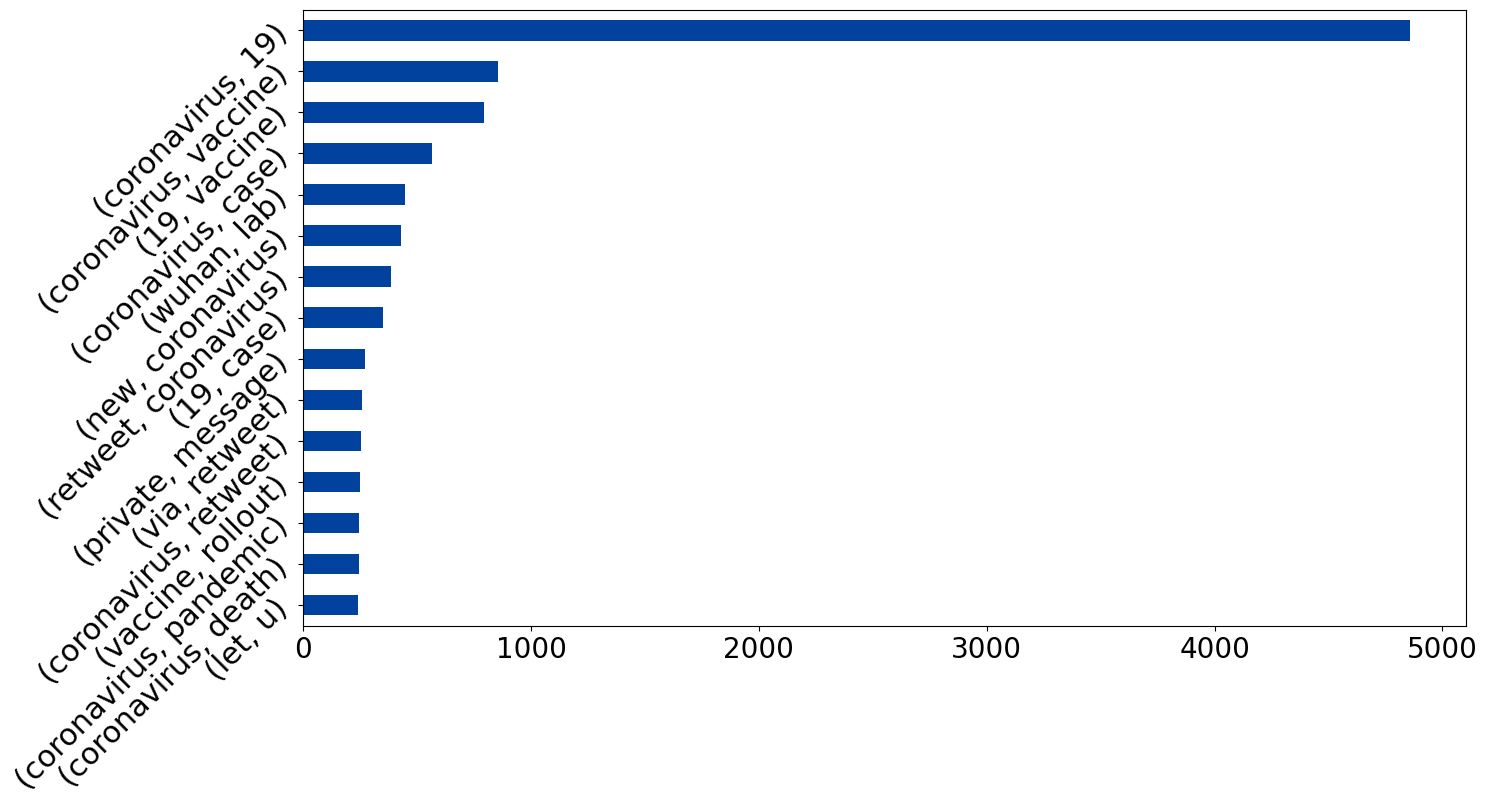

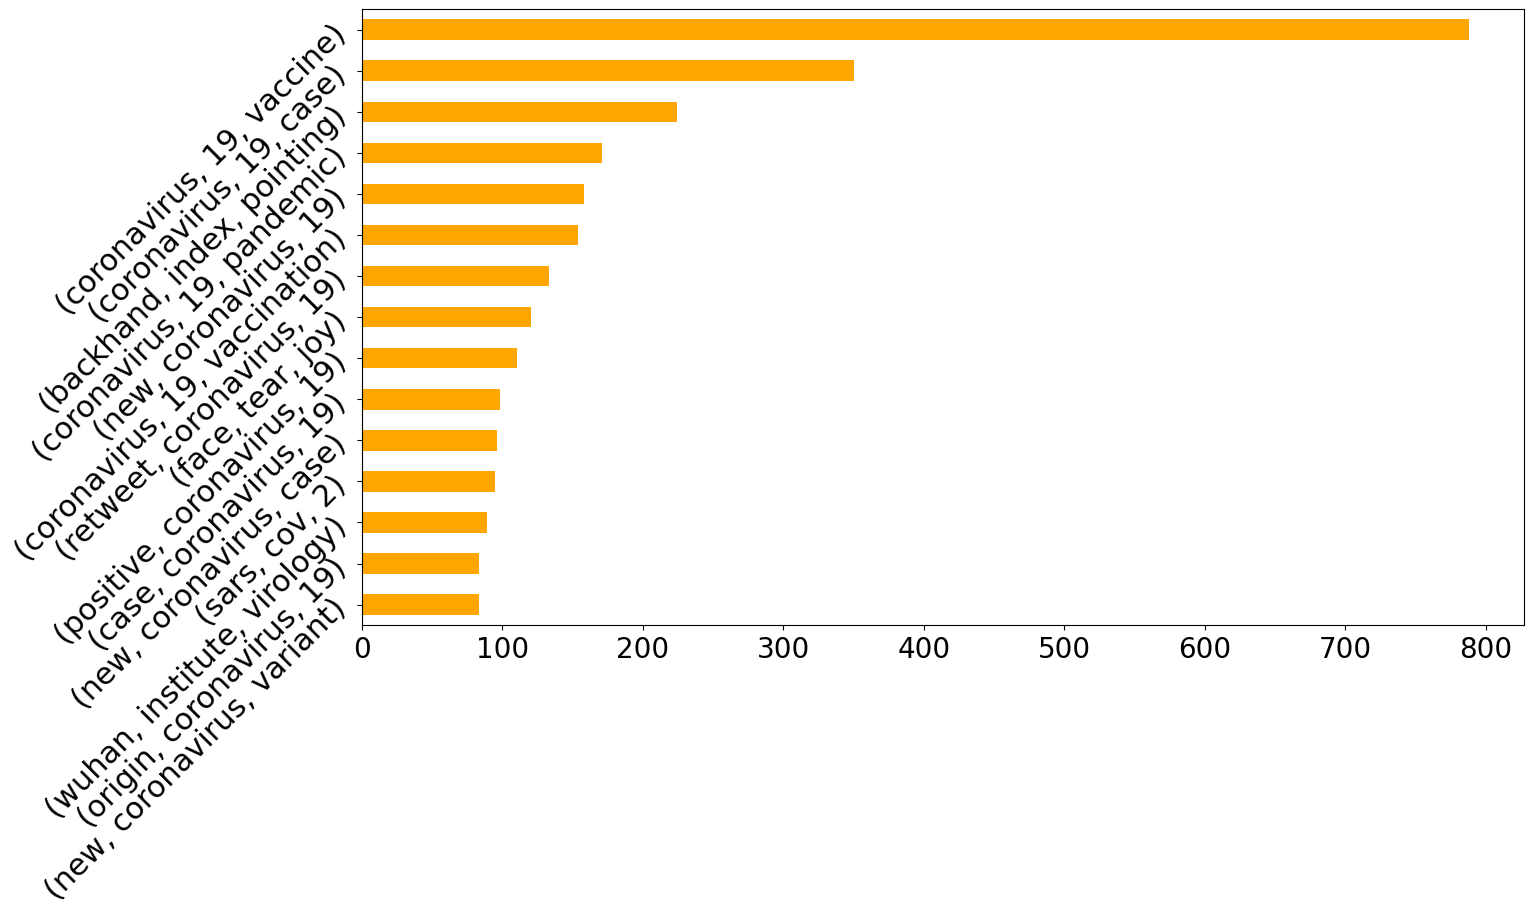

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


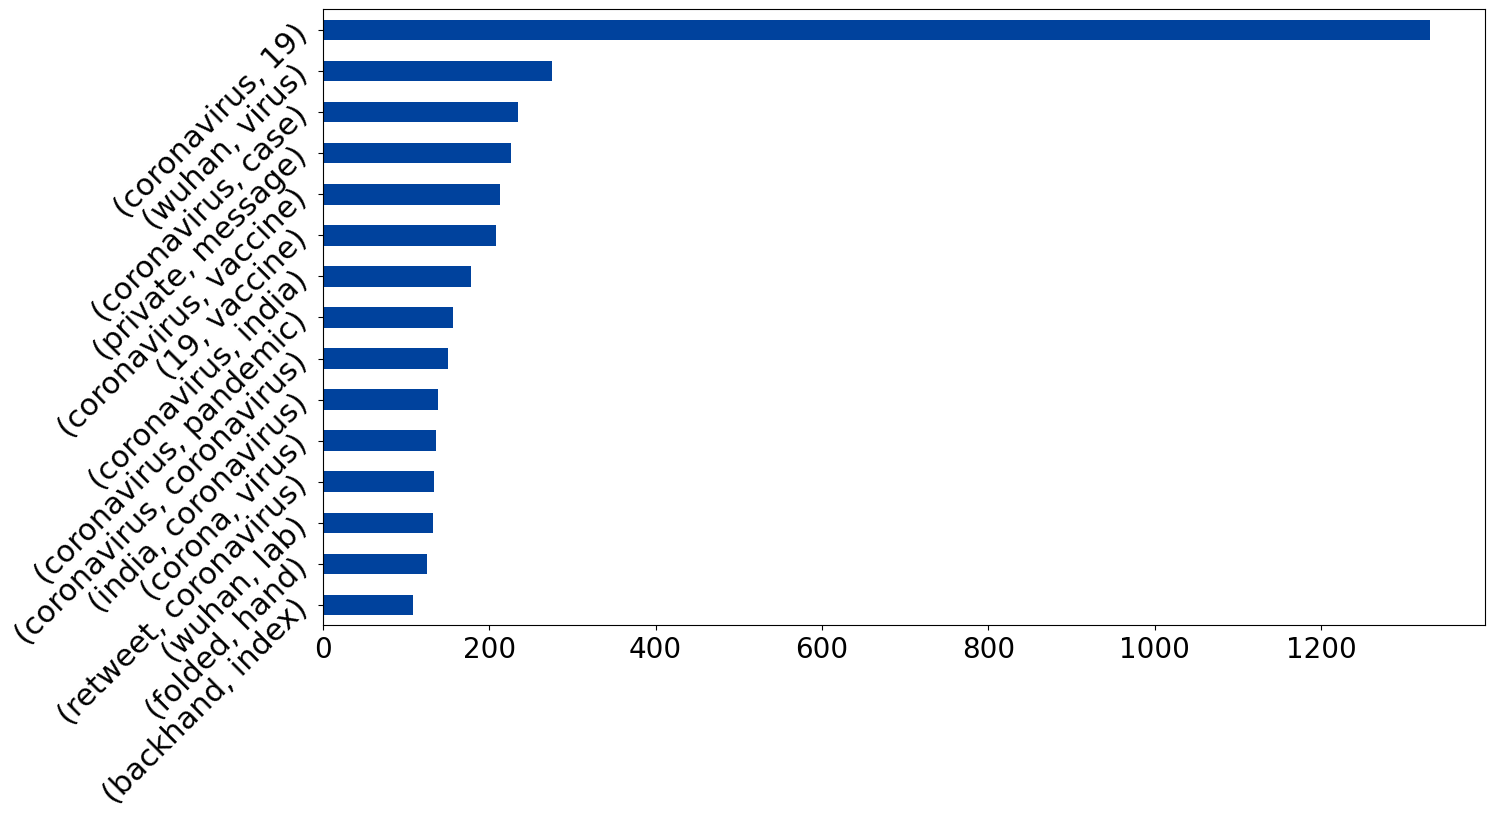

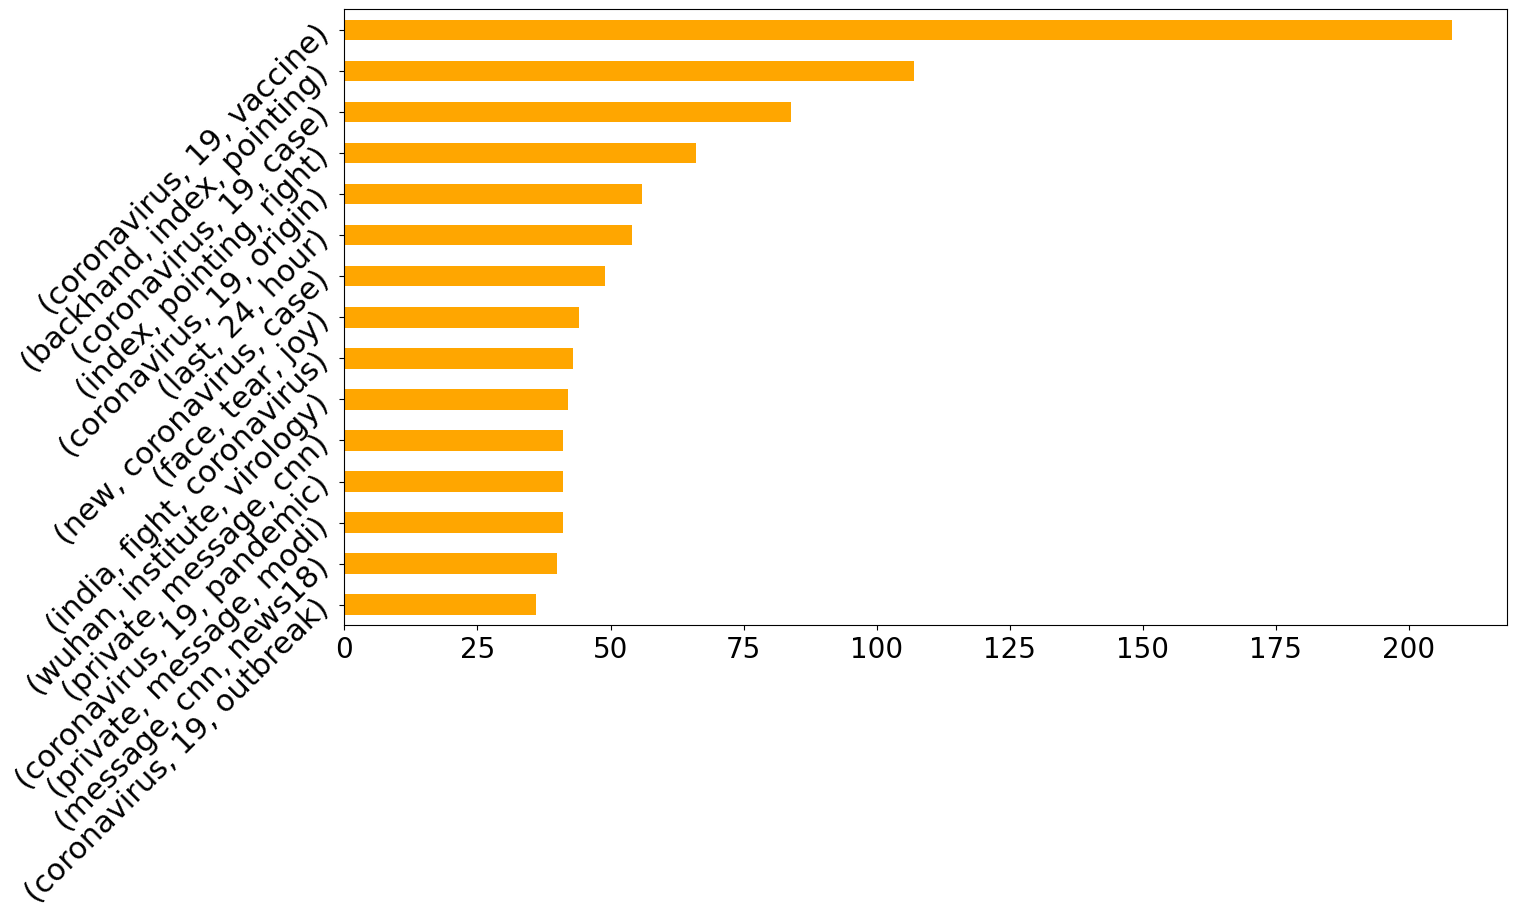

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


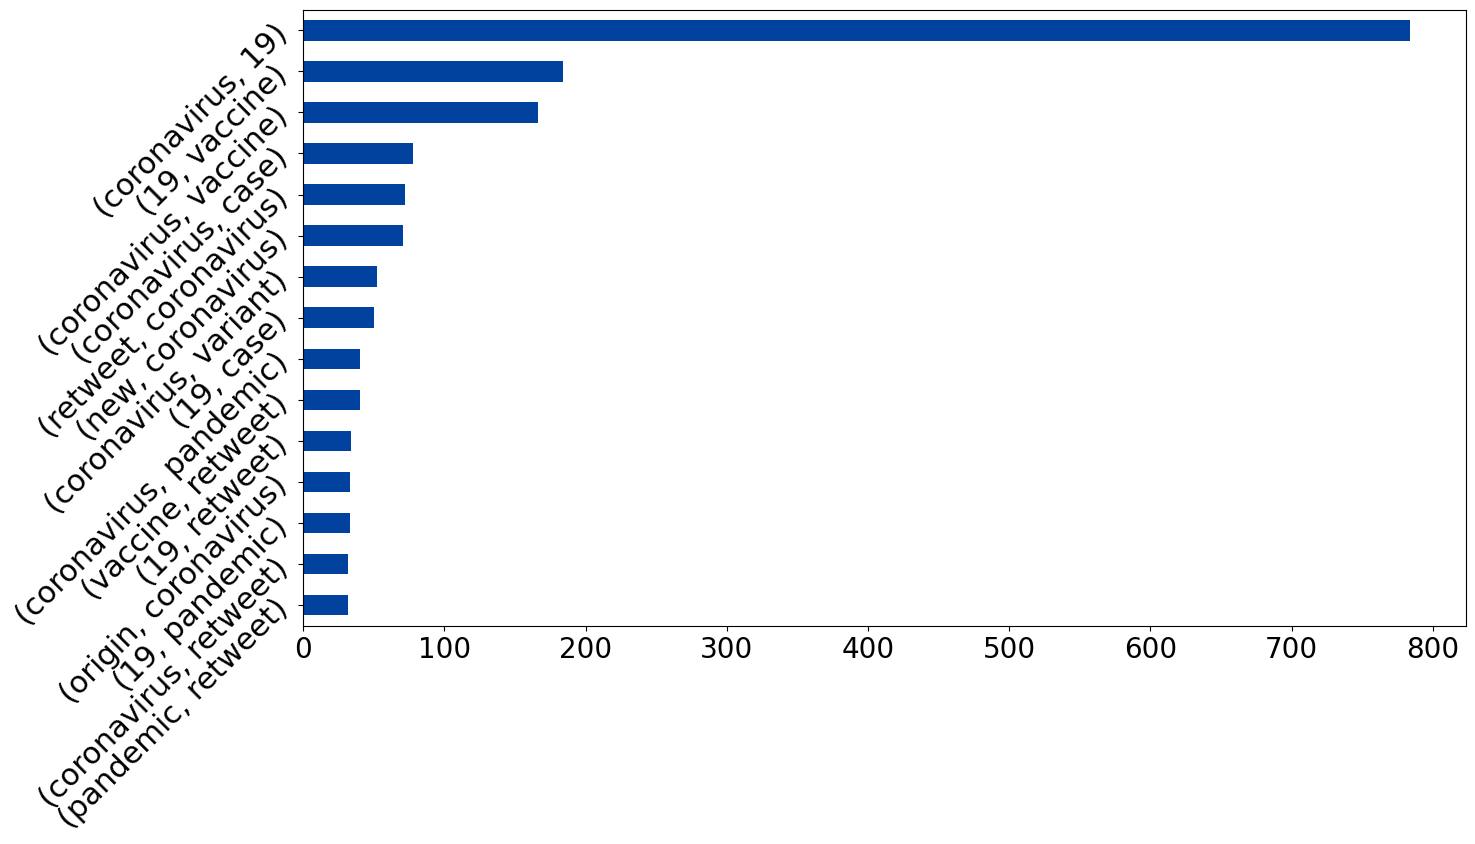

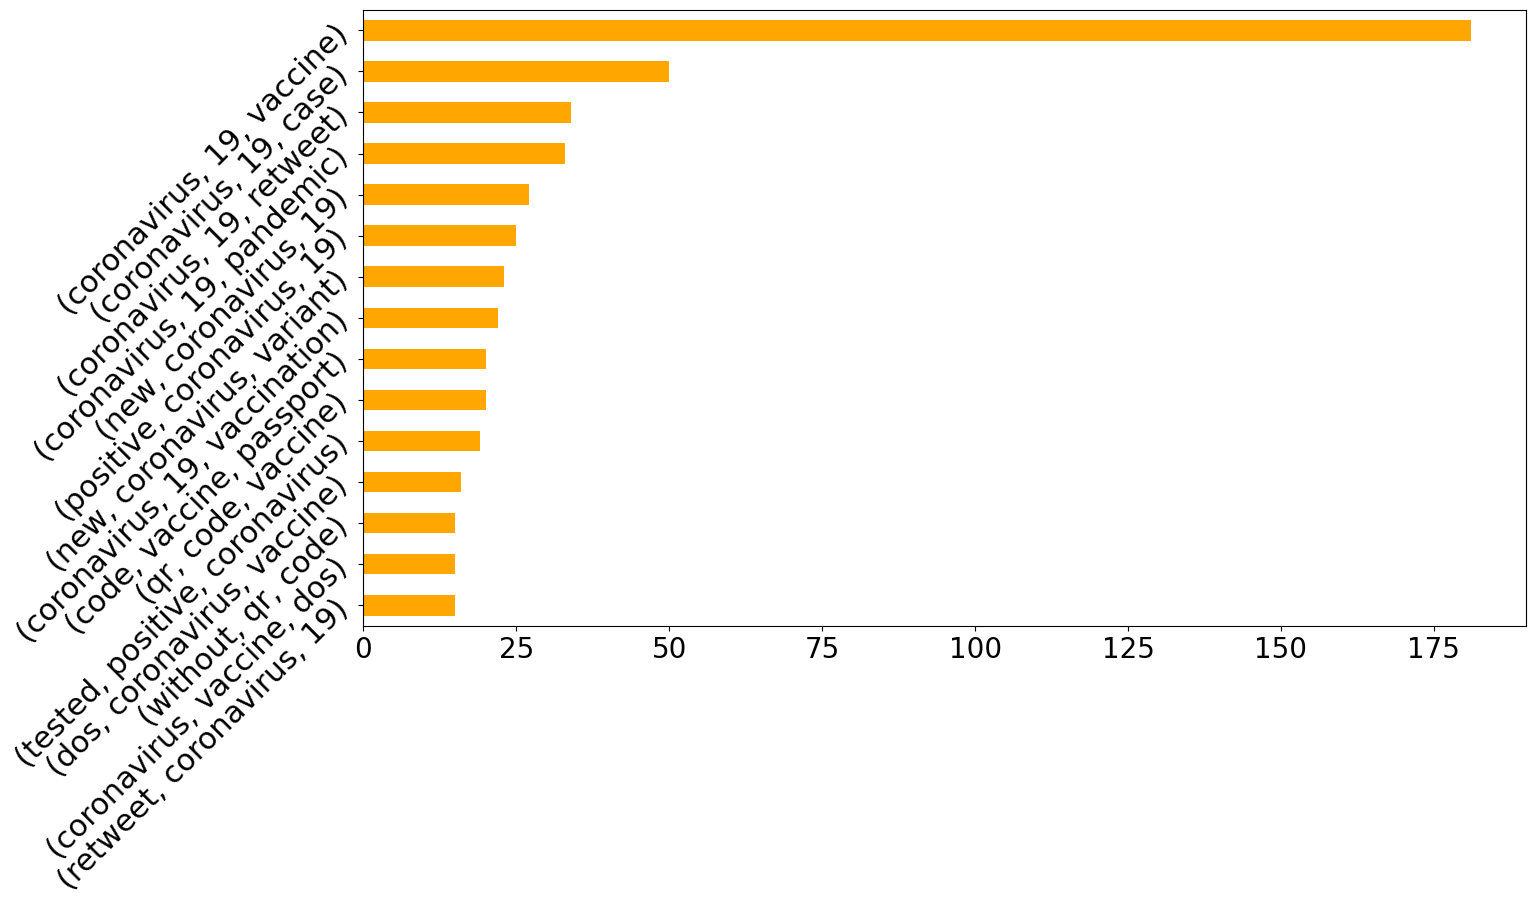

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


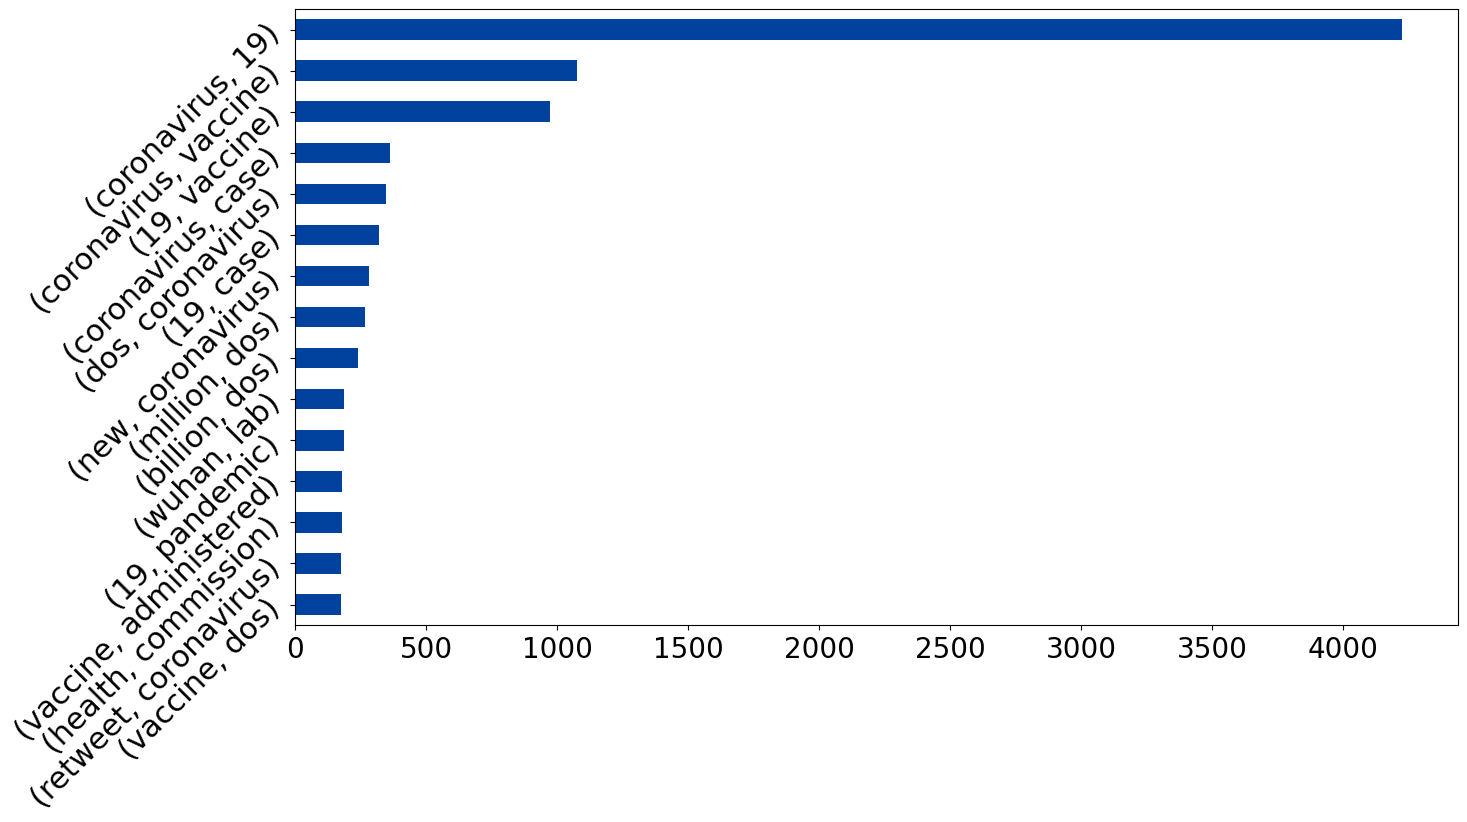

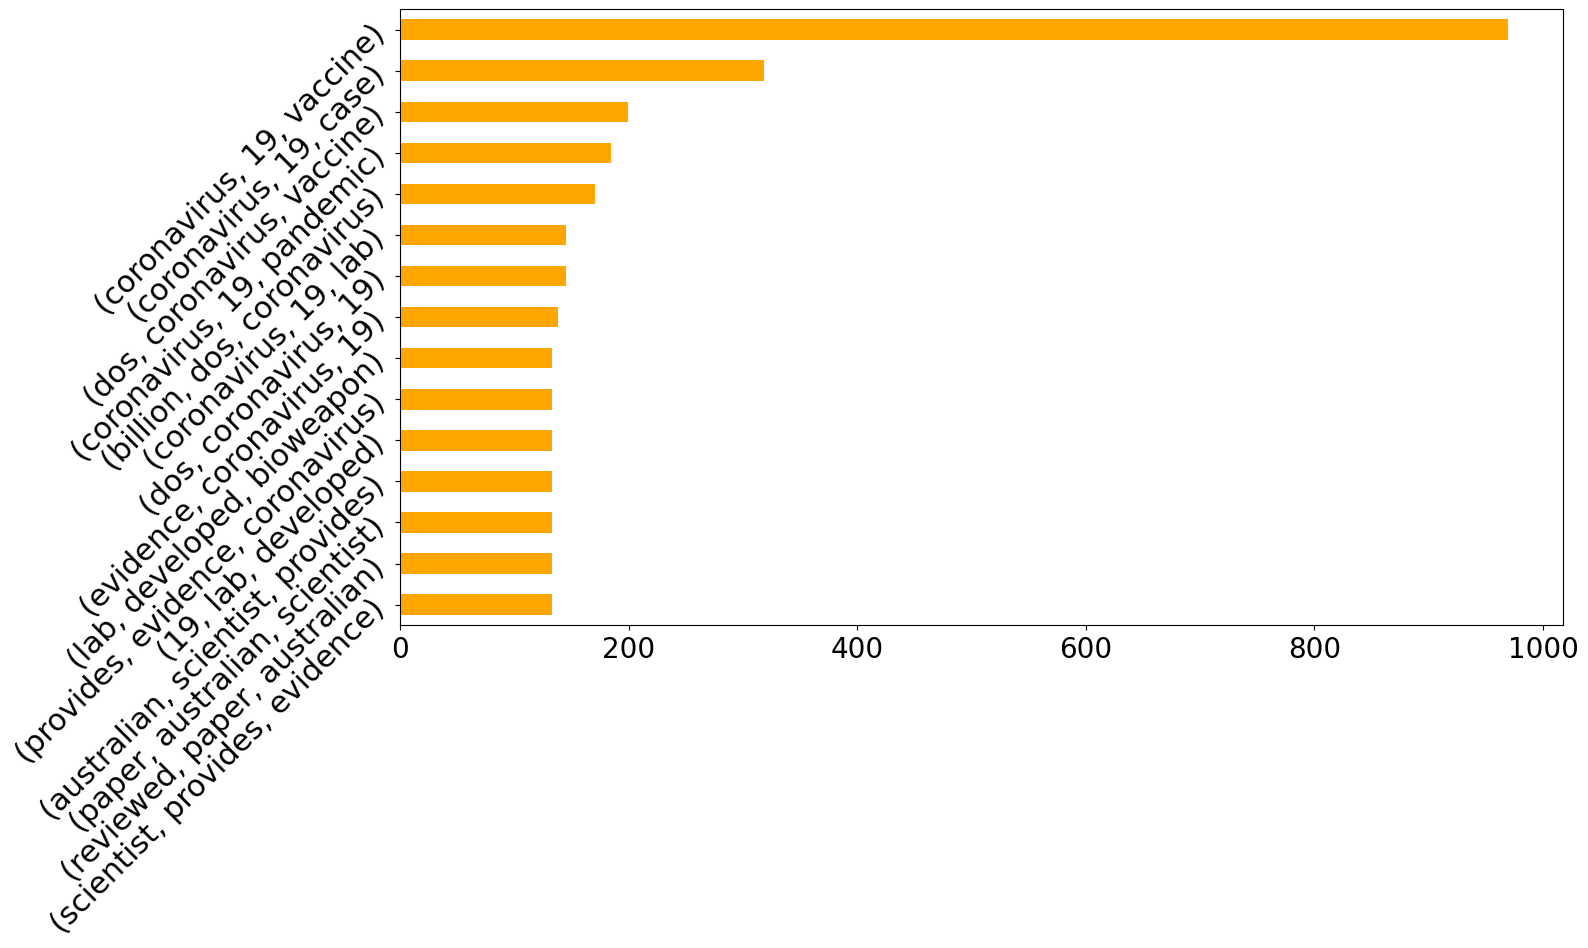

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


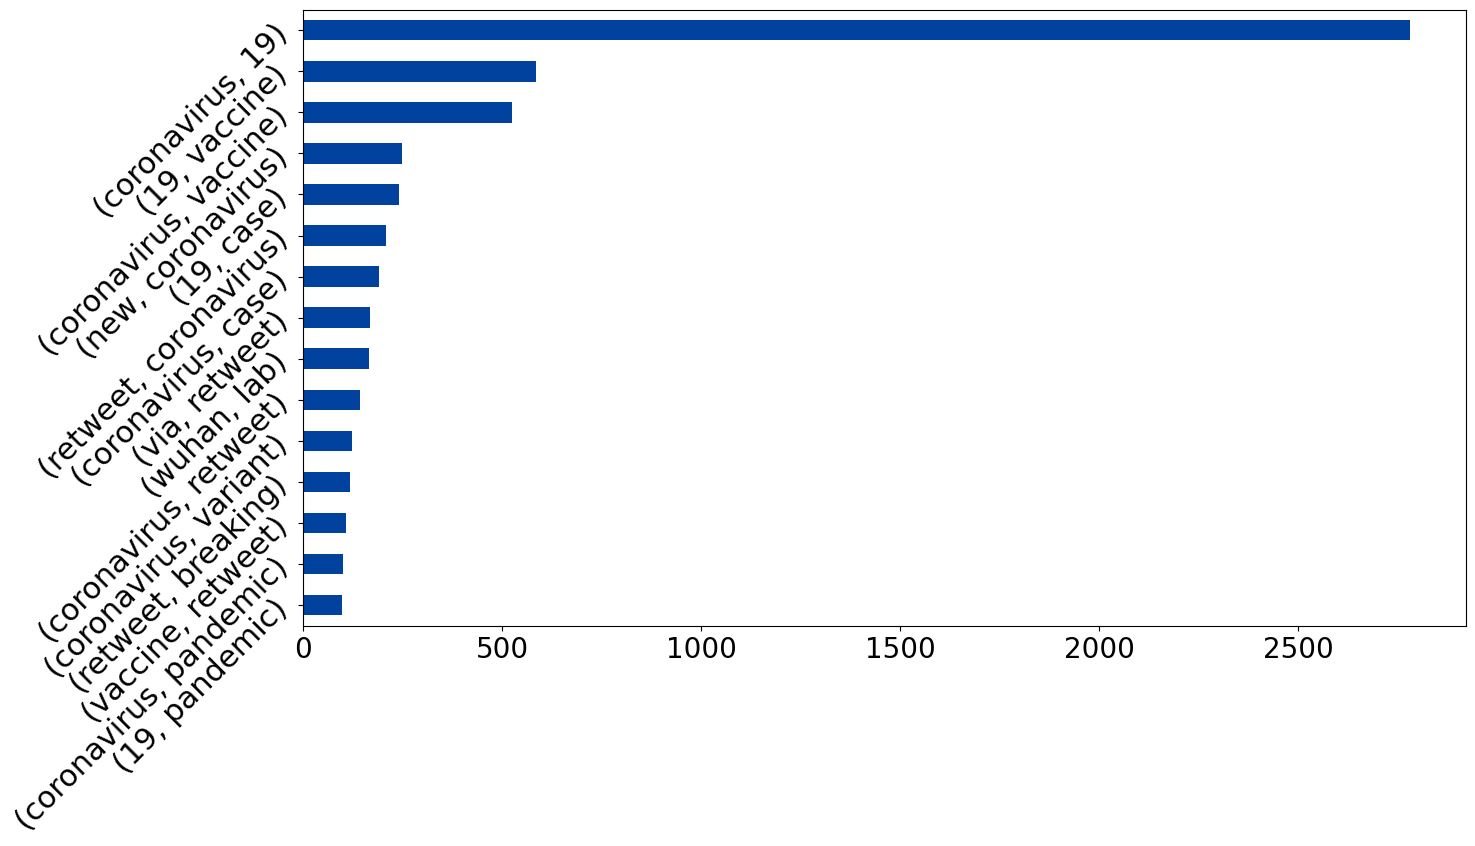

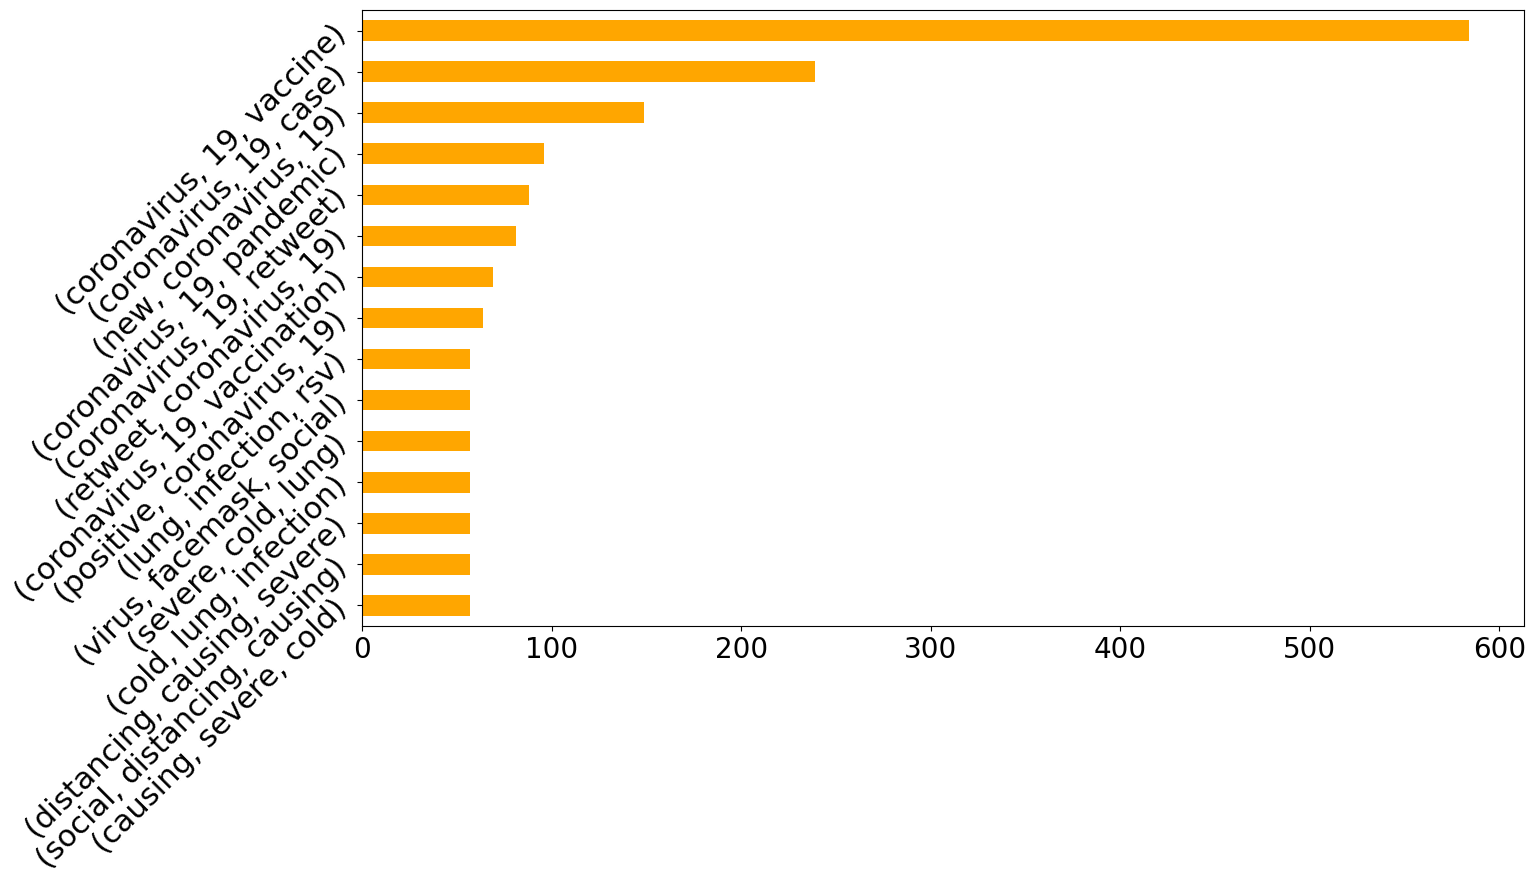

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


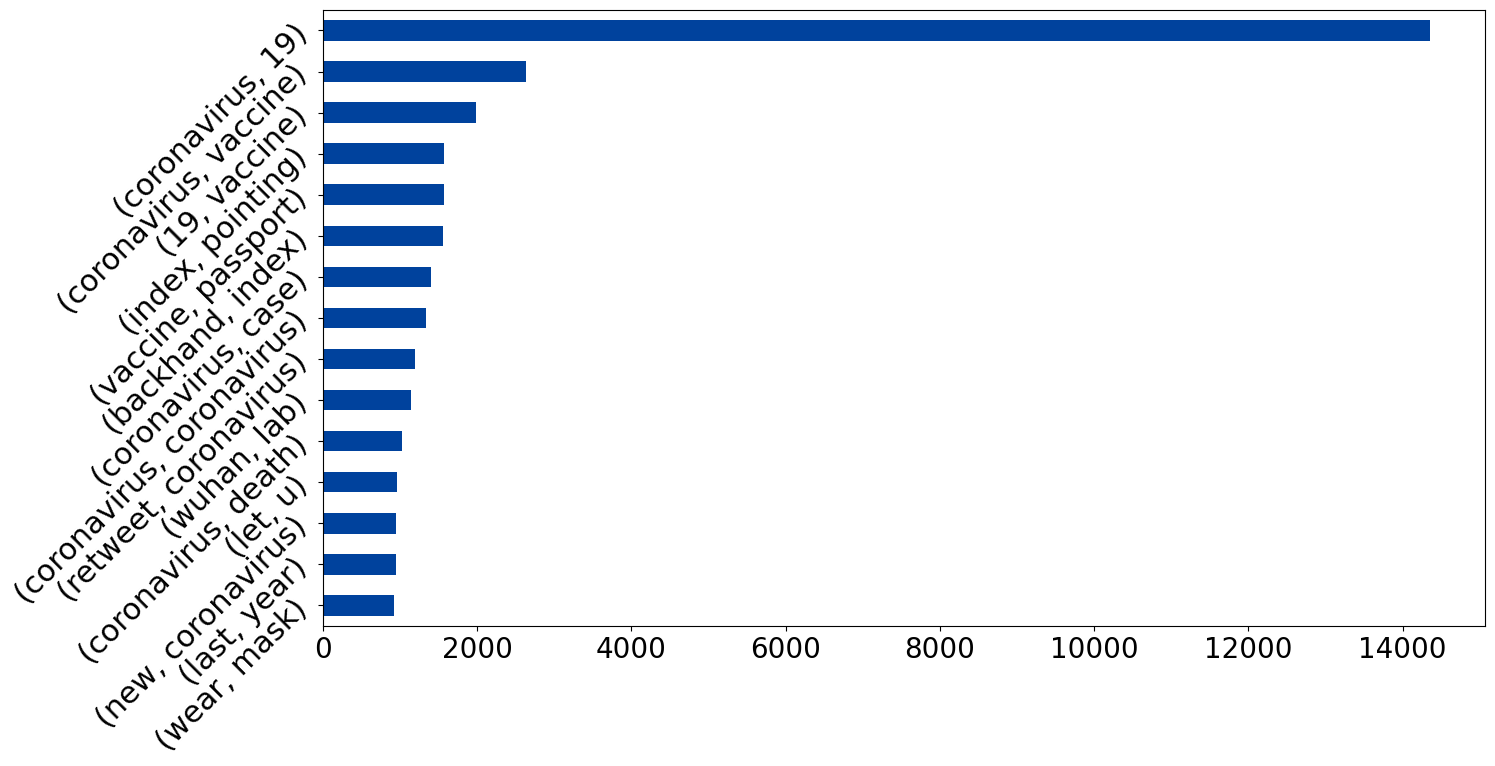

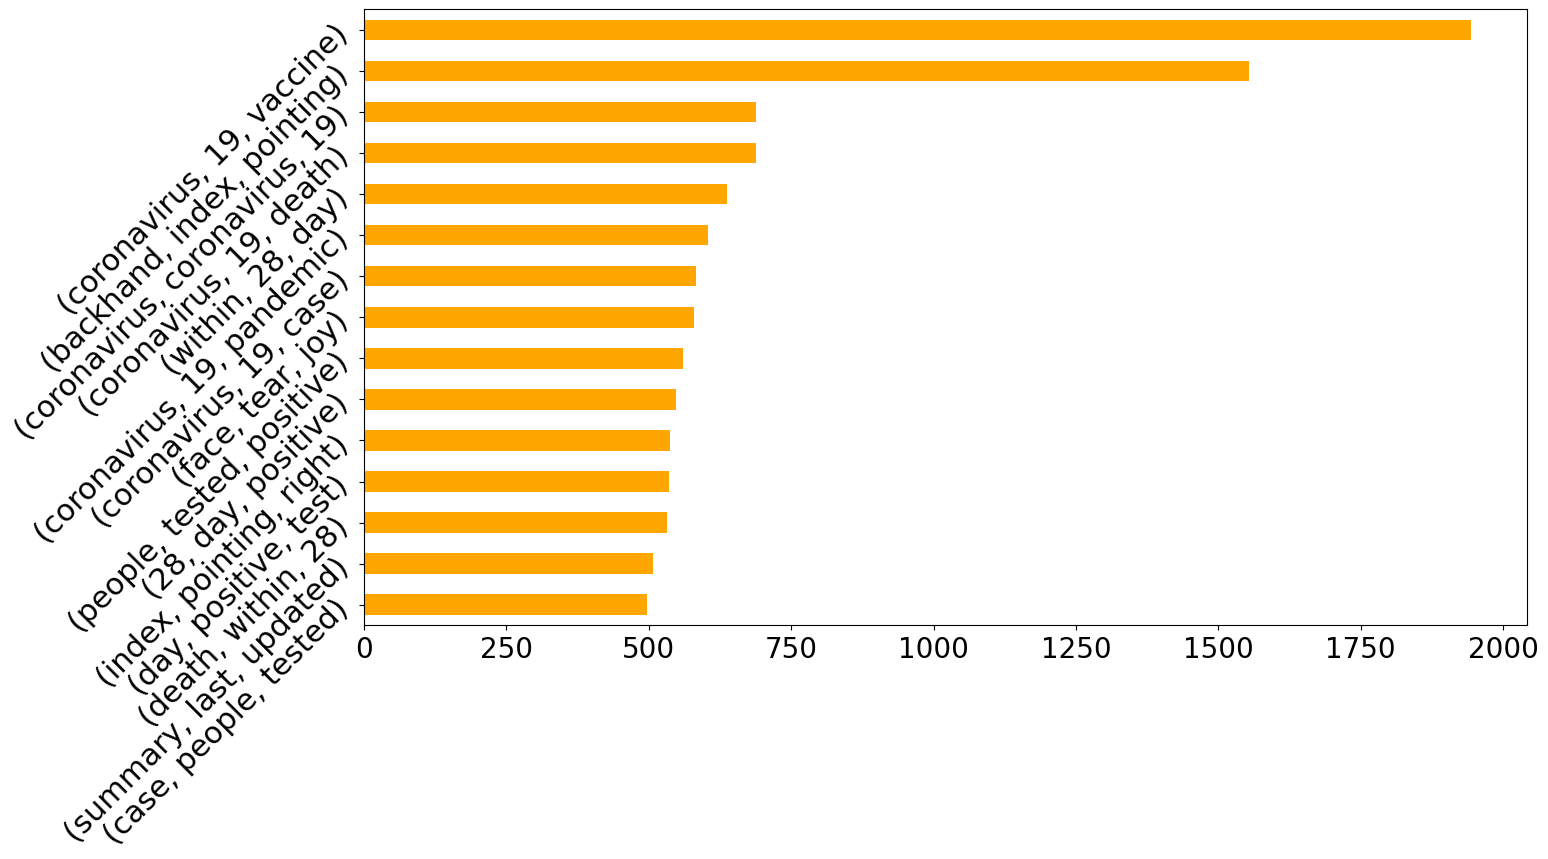

In [36]:
countries = ['Australia', 'India', 'Indonesia', 'Japan', 'Brazil', 'UK']

# Plot n-grams for each country
start_date = '2021-01-01'
end_date = '2021-12-31'
for country in countries:
    country_data = df[df['country'] == country]
    plot_ngrams_for_dataset1(country_data, country, start_date, end_date, n=[2, 3], top=15)

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


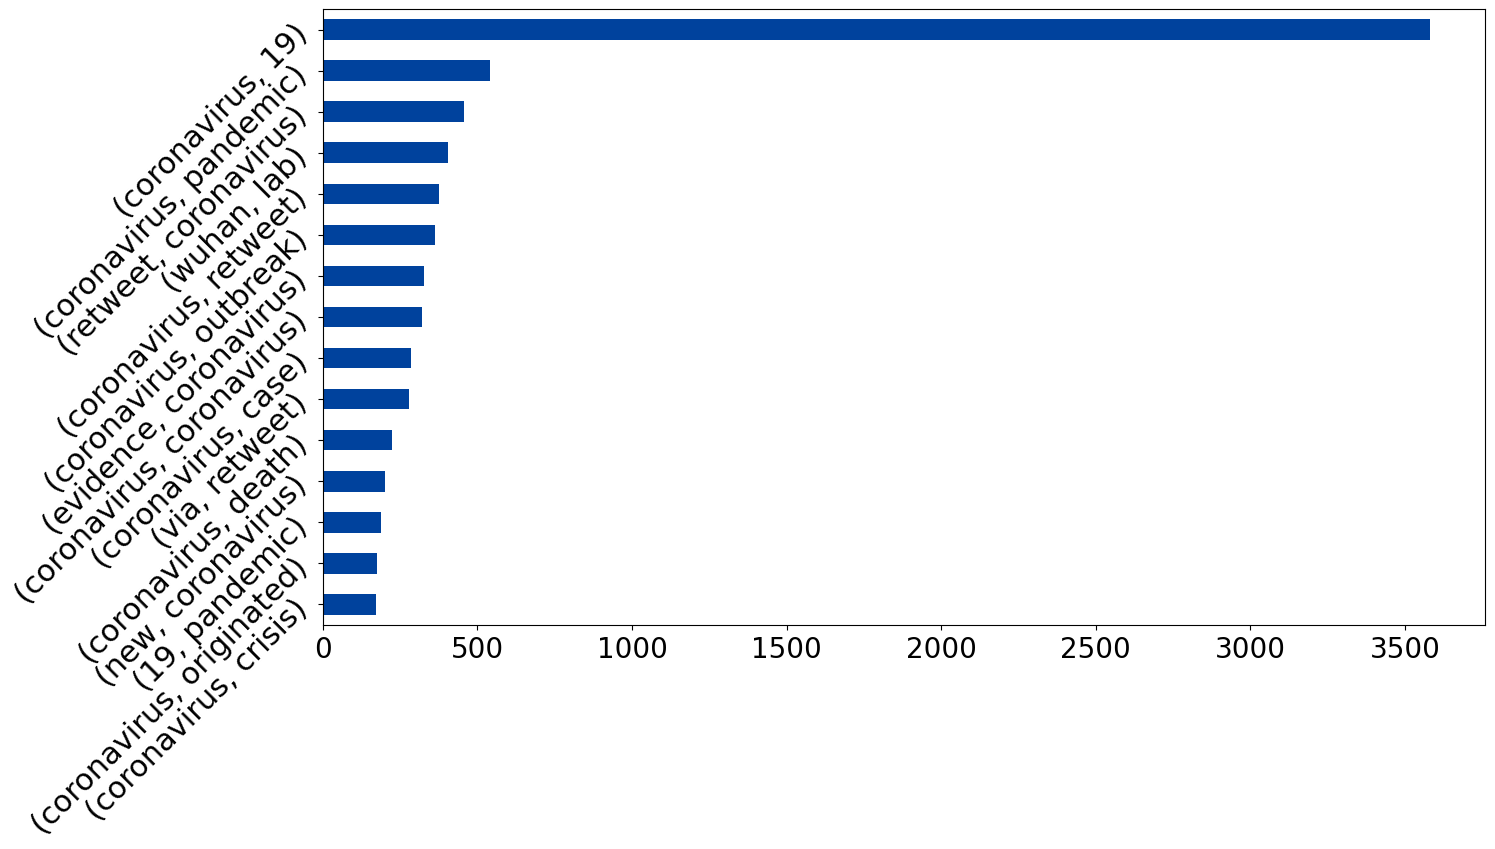

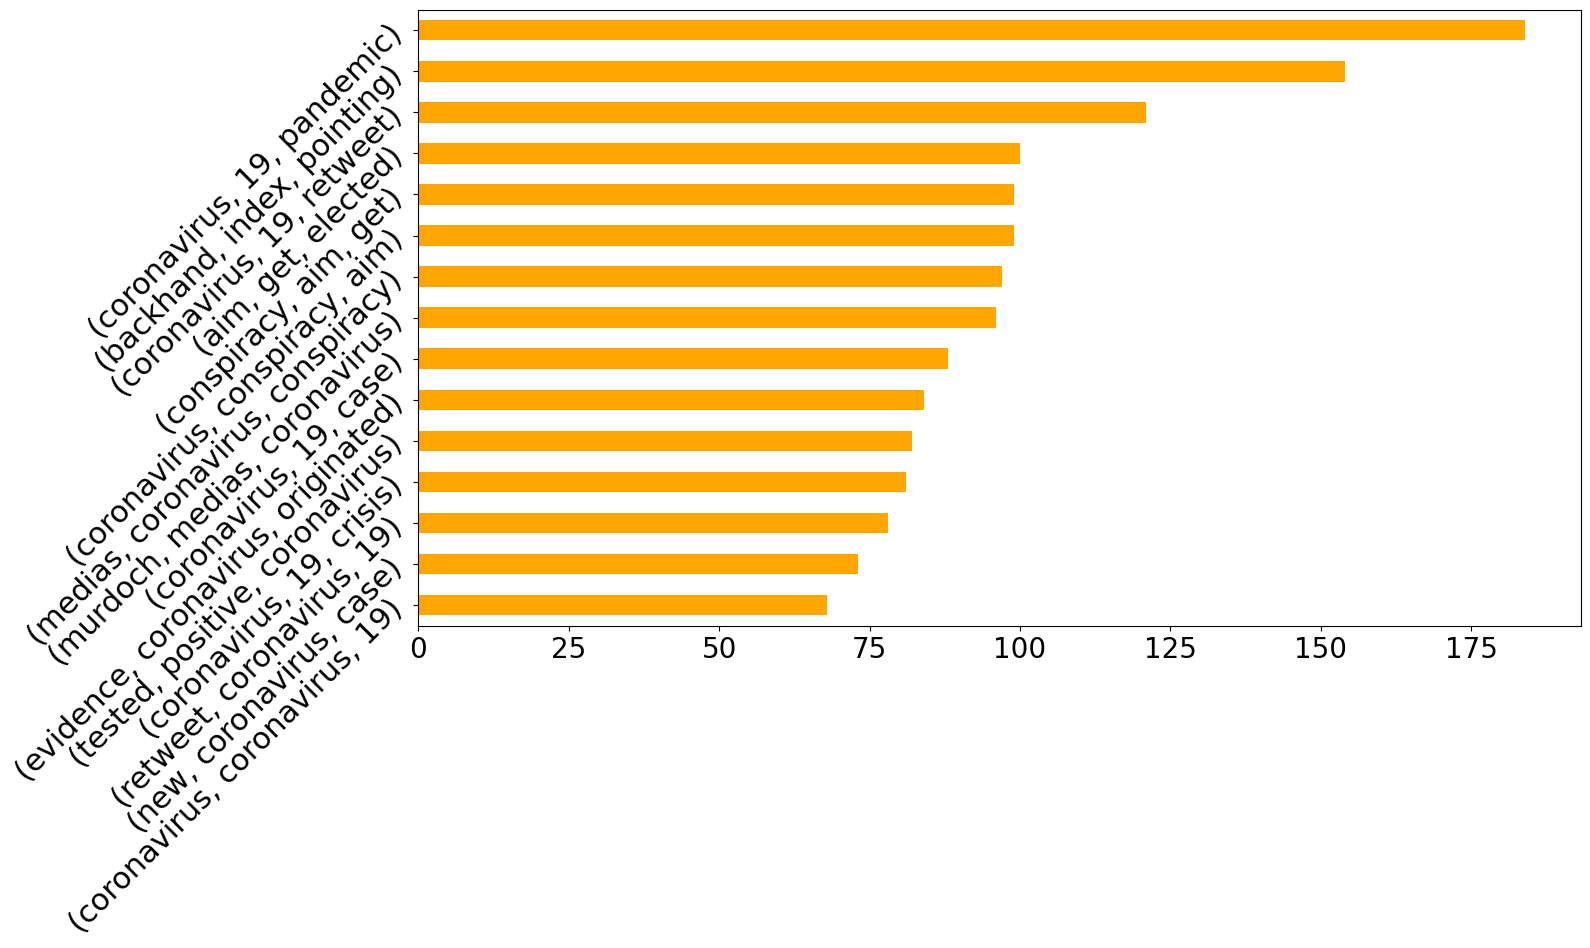

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


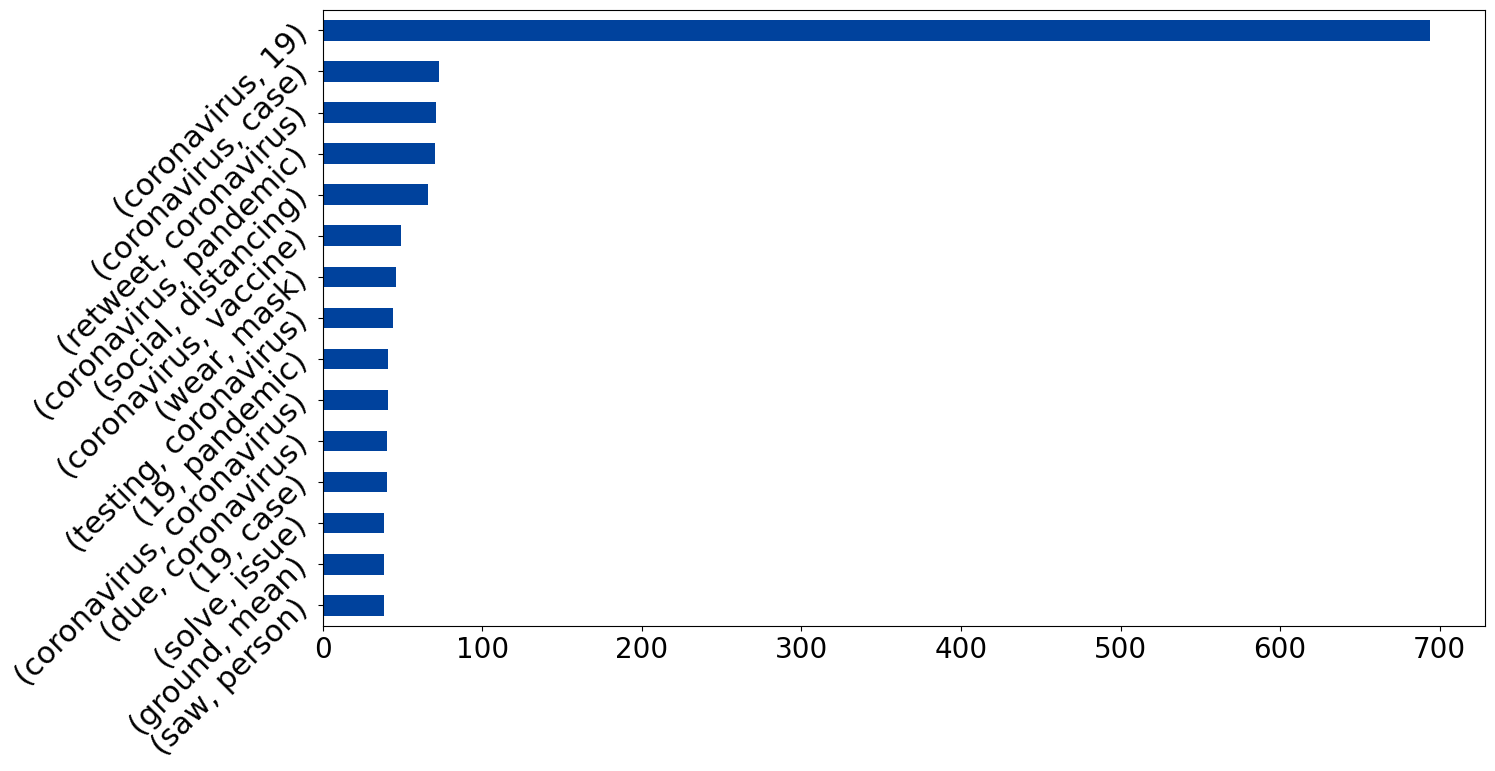

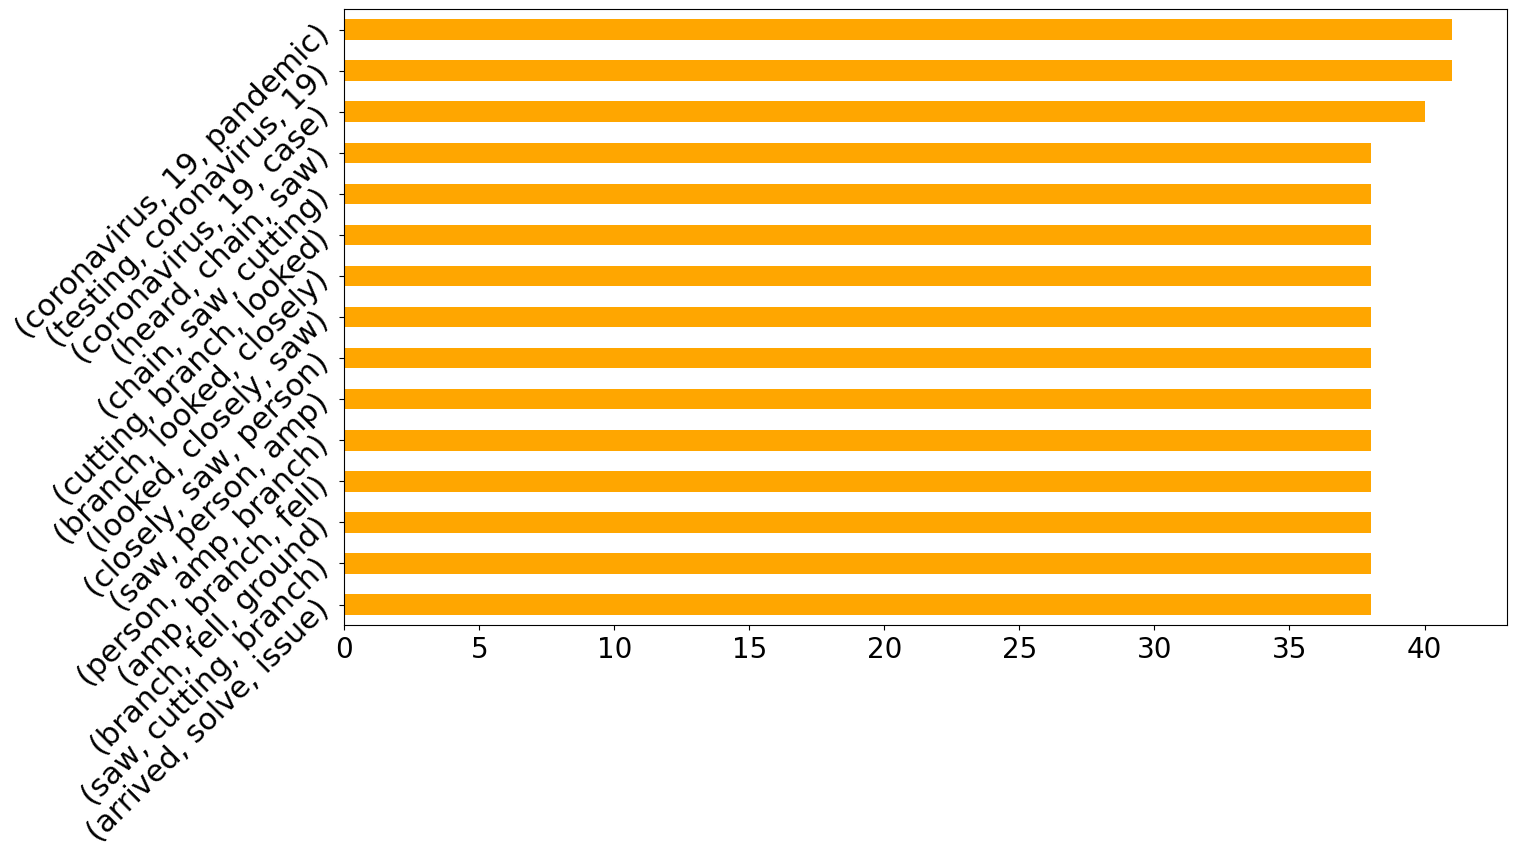

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


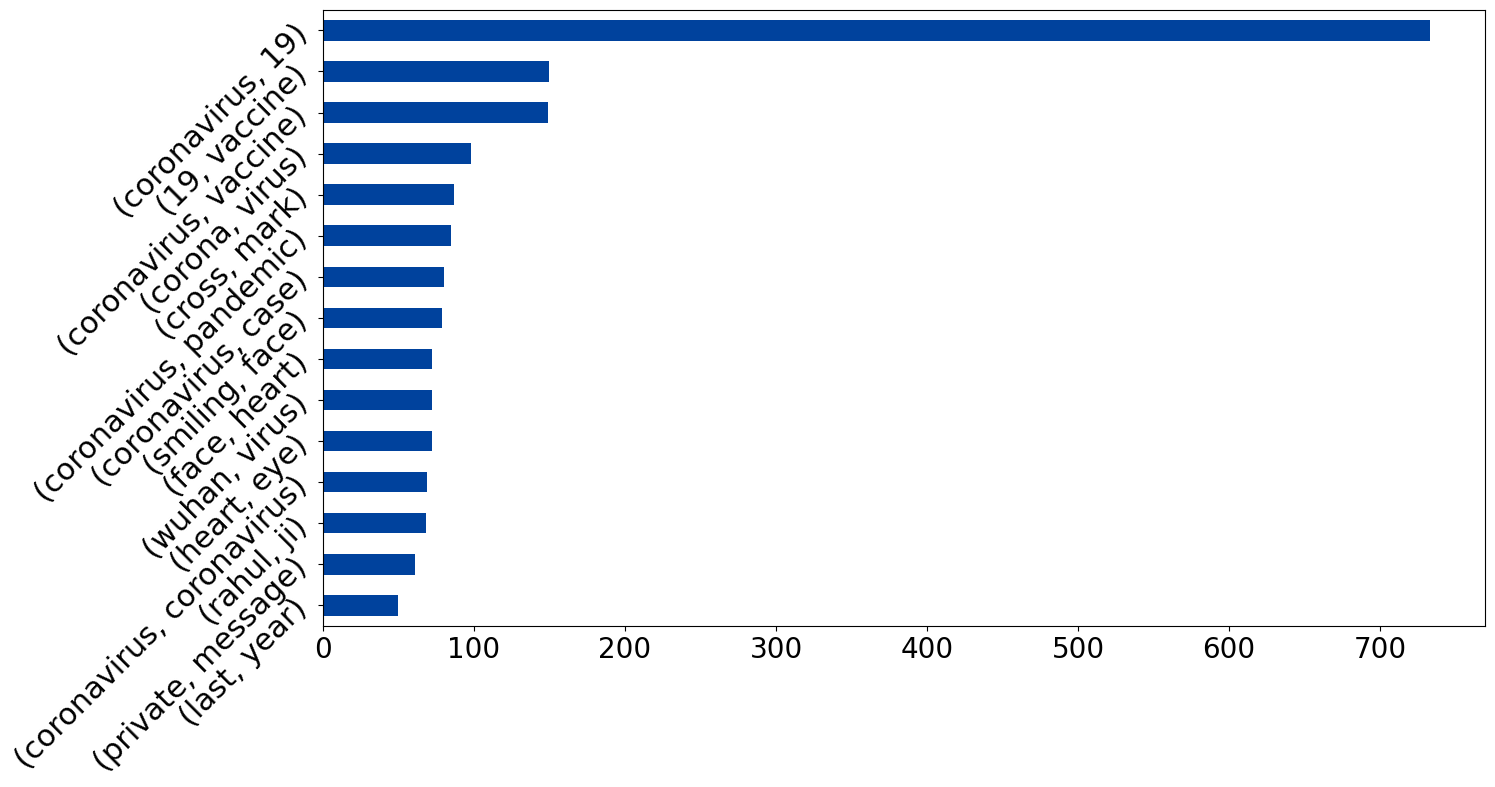

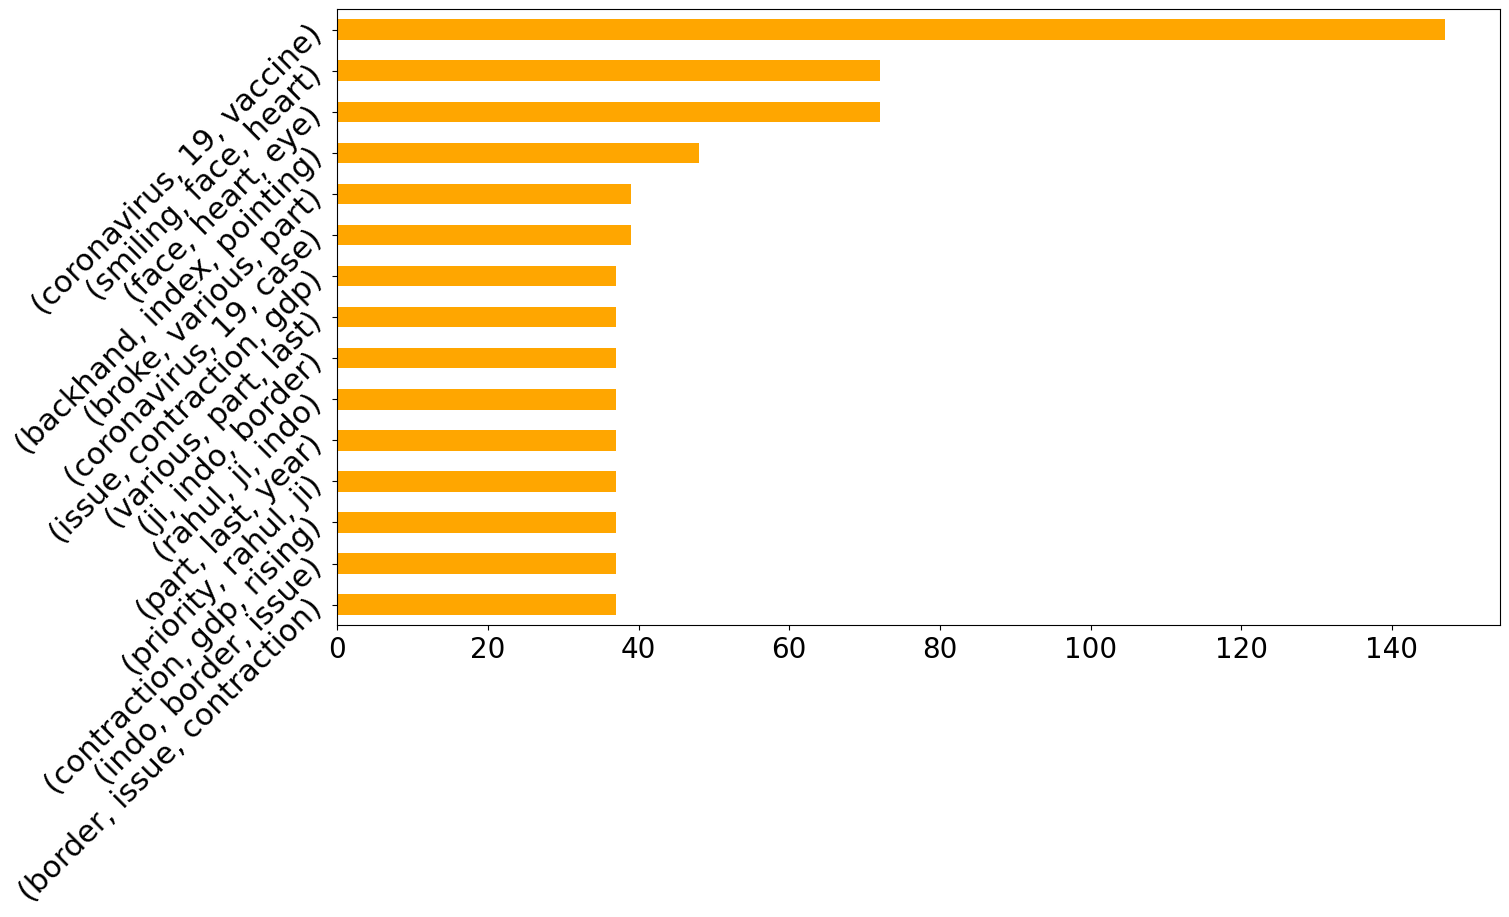

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


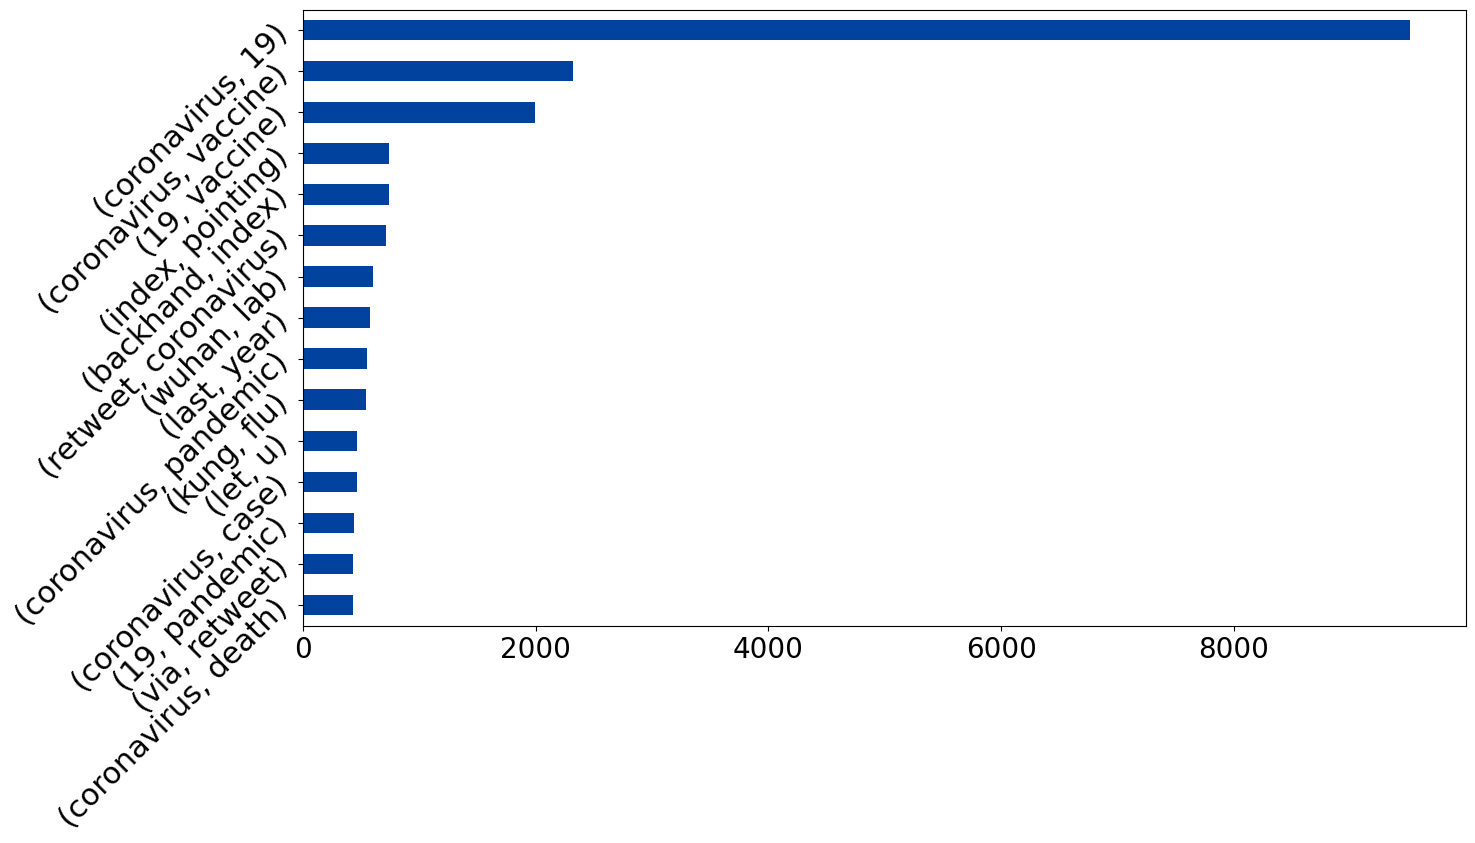

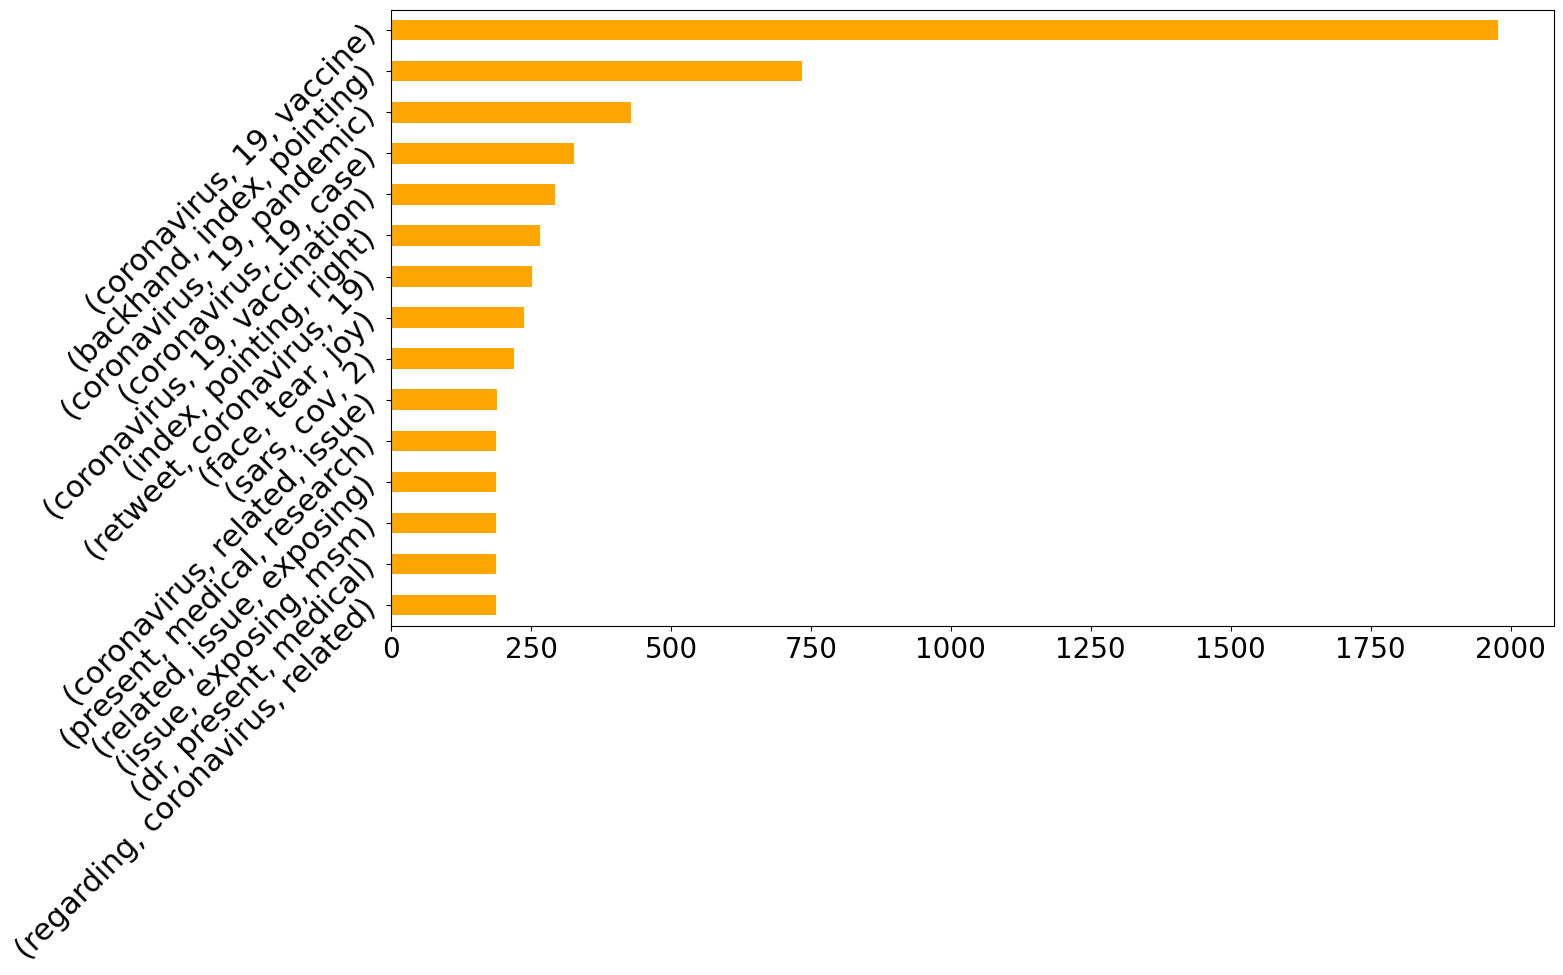

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


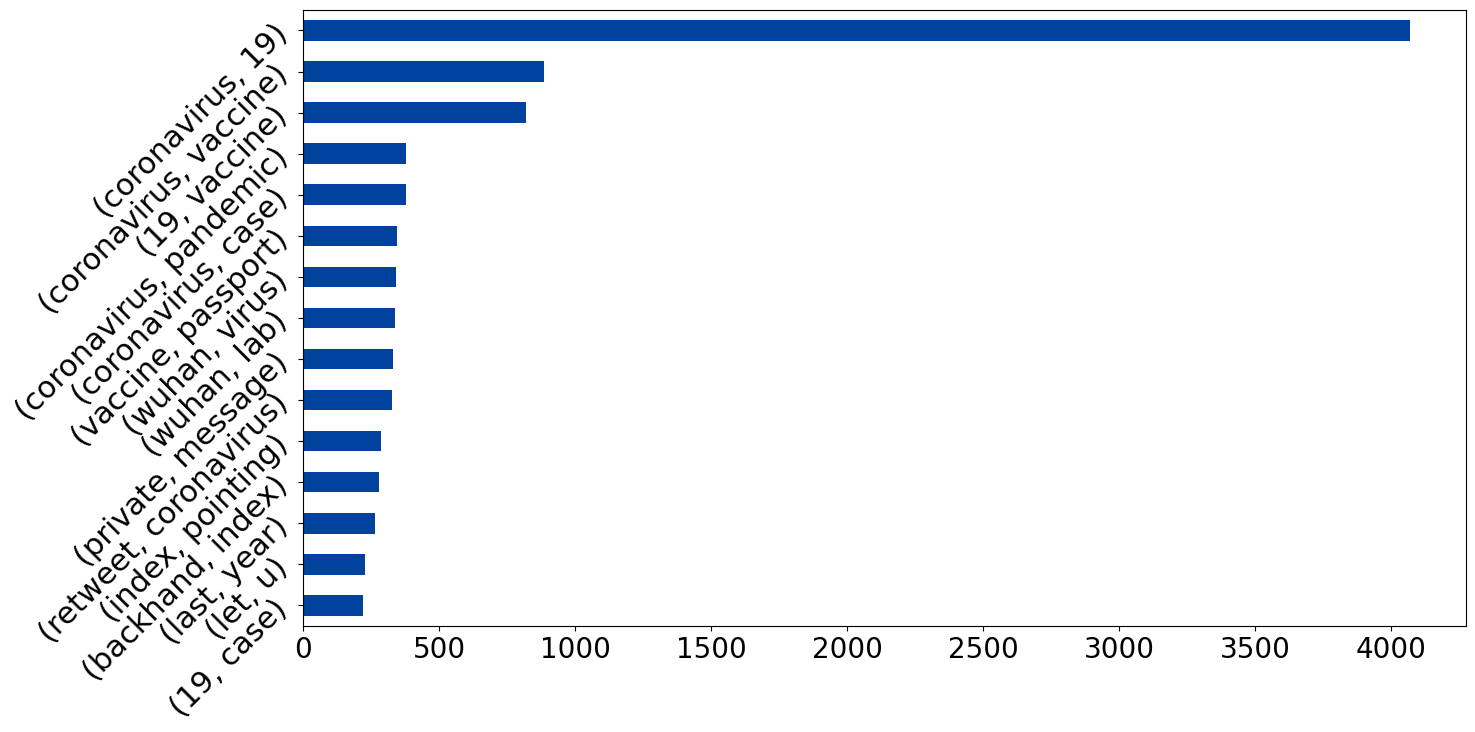

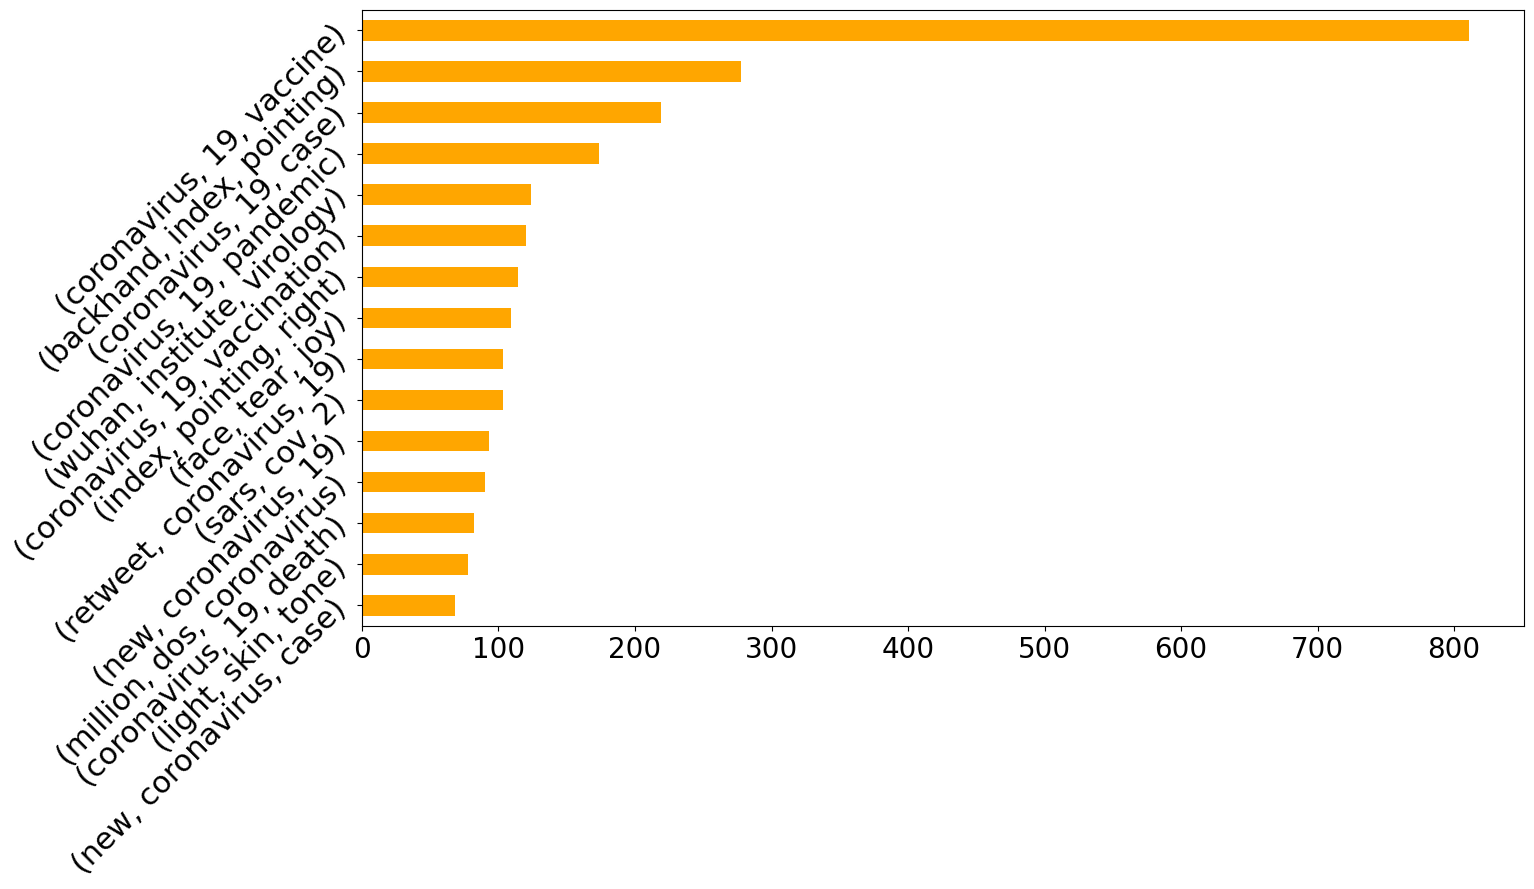

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


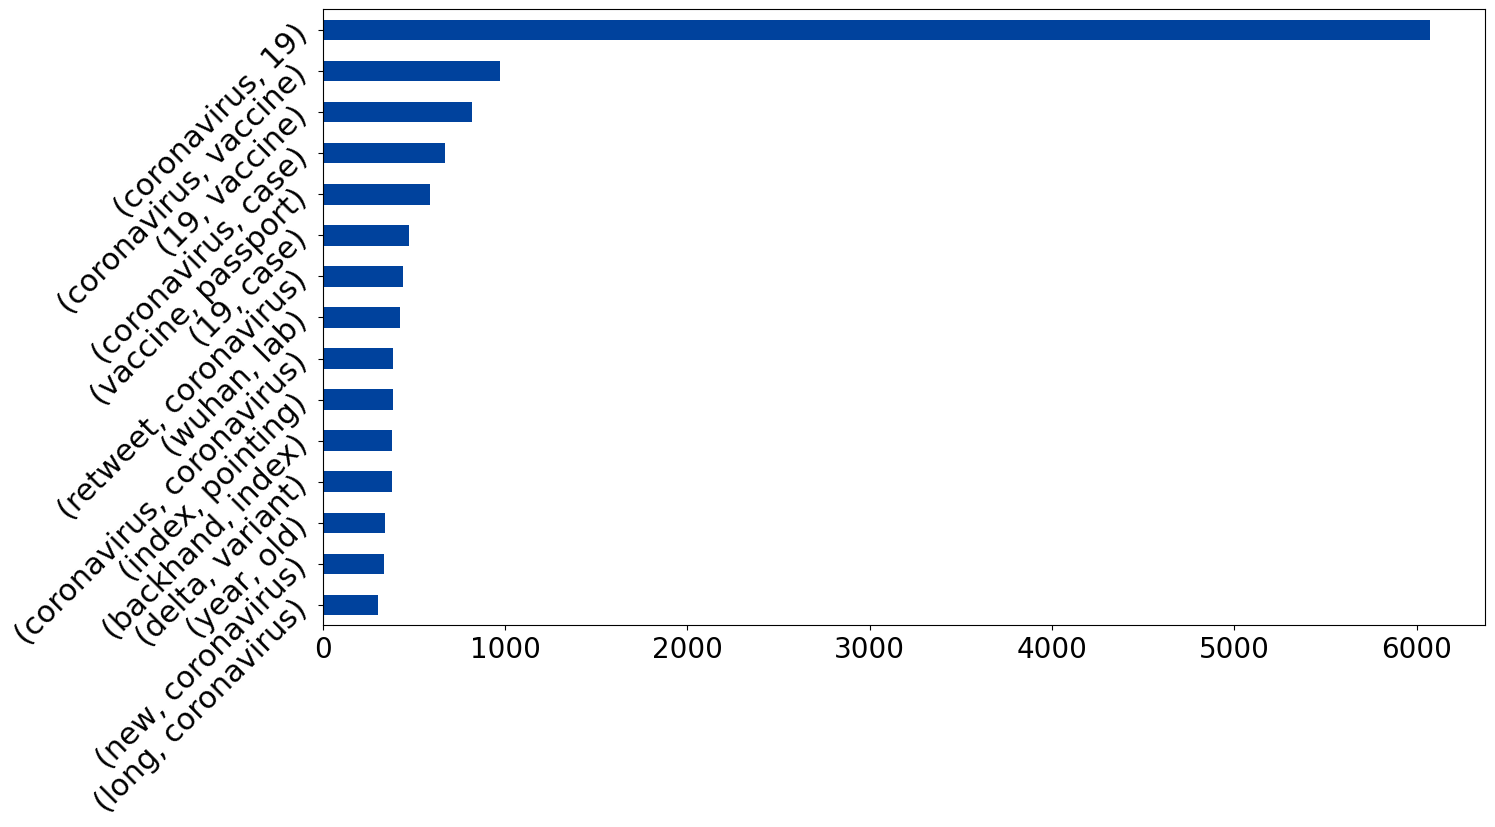

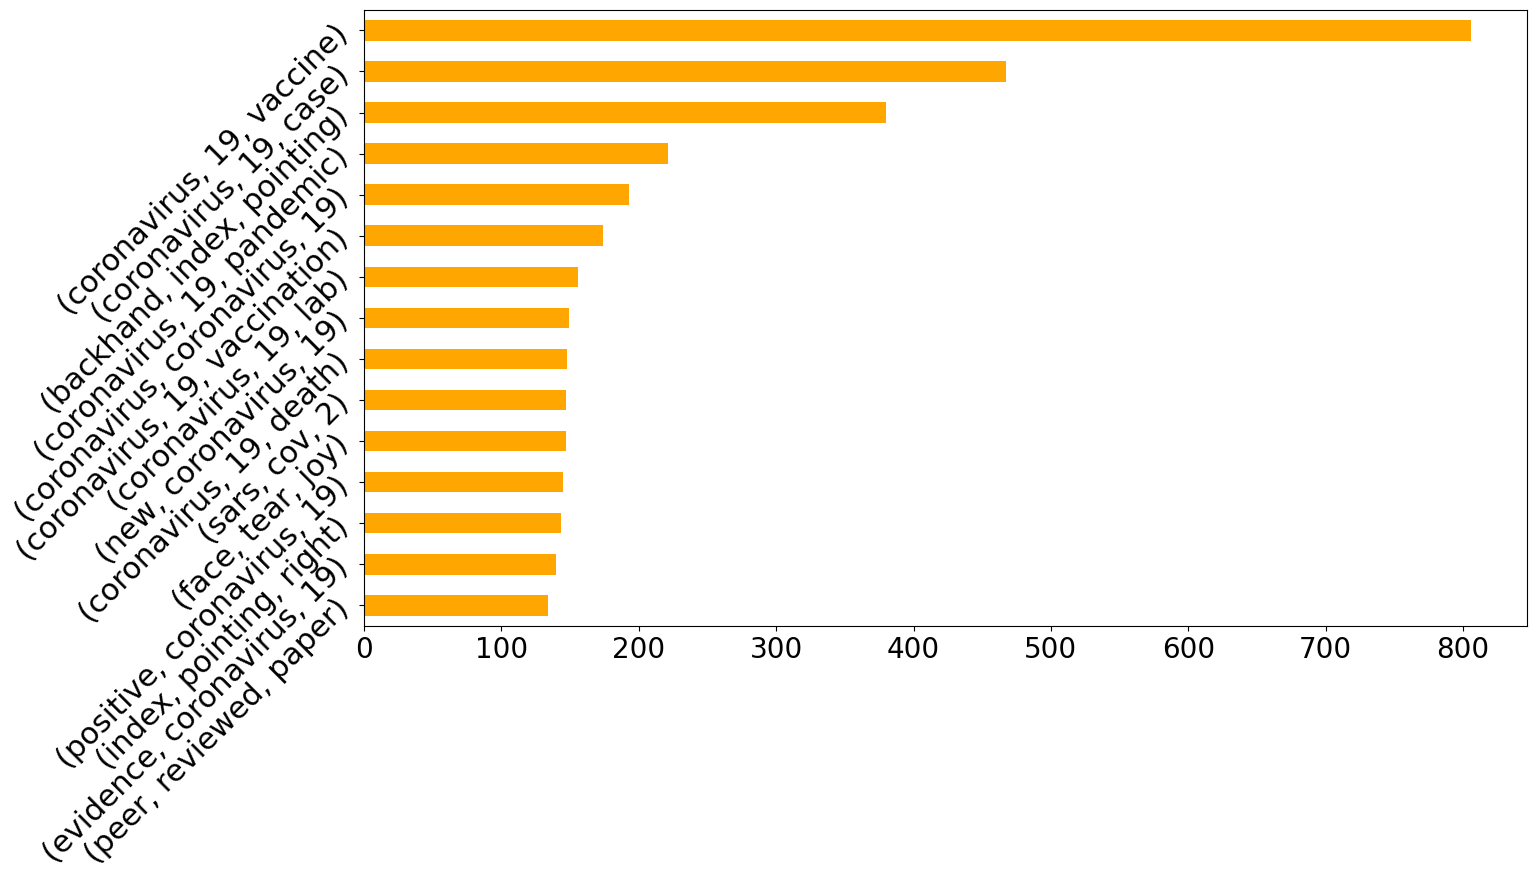

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


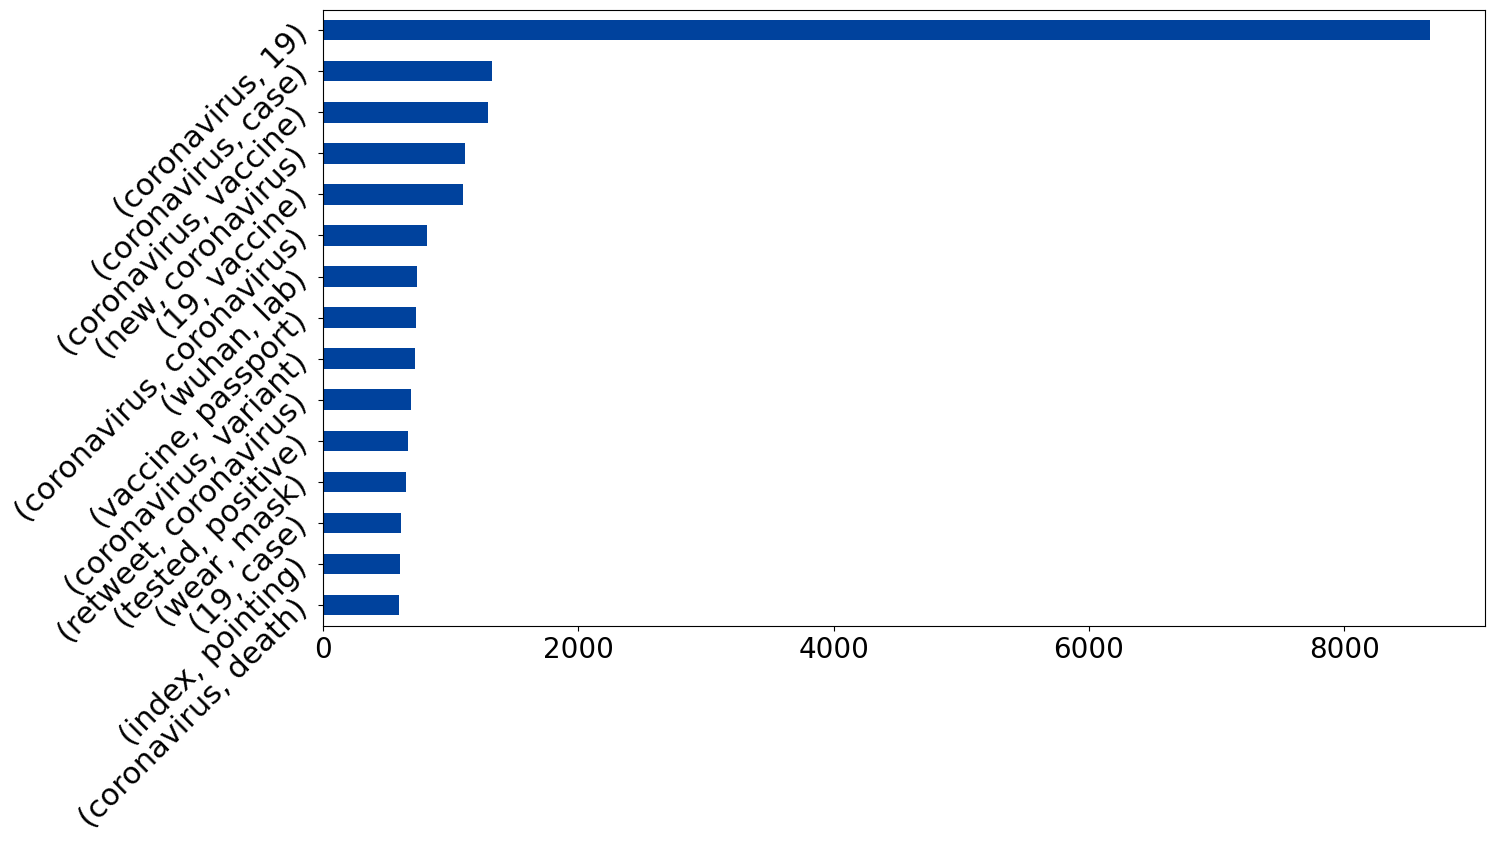

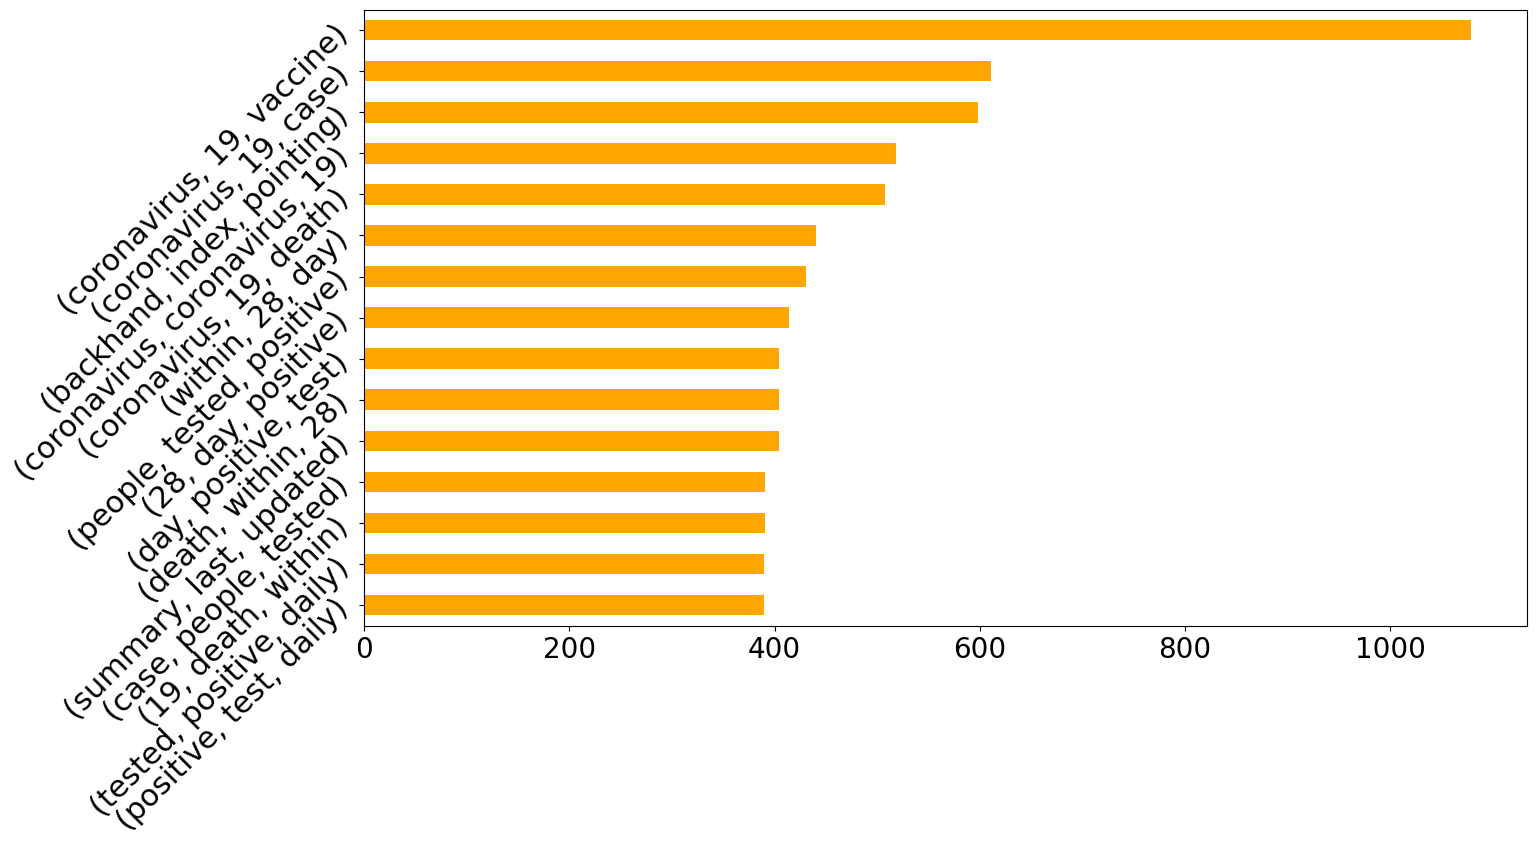

C:\Users\无敌晨晨\AppData\Local\Temp\ipykernel_24080\1255454465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quarterly_data['Tweet'] = quarterly_data['Tweet'].astype(str)


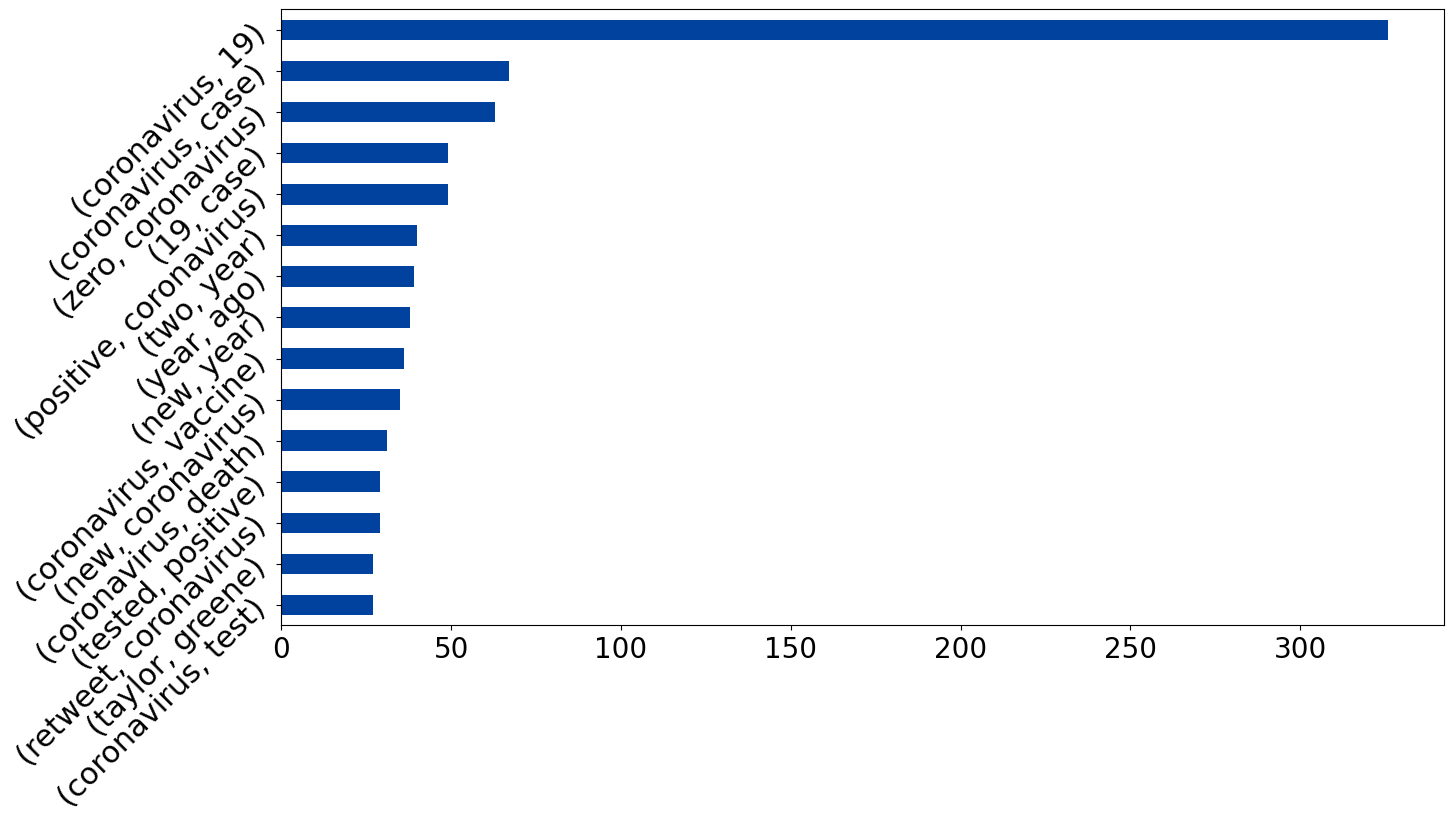

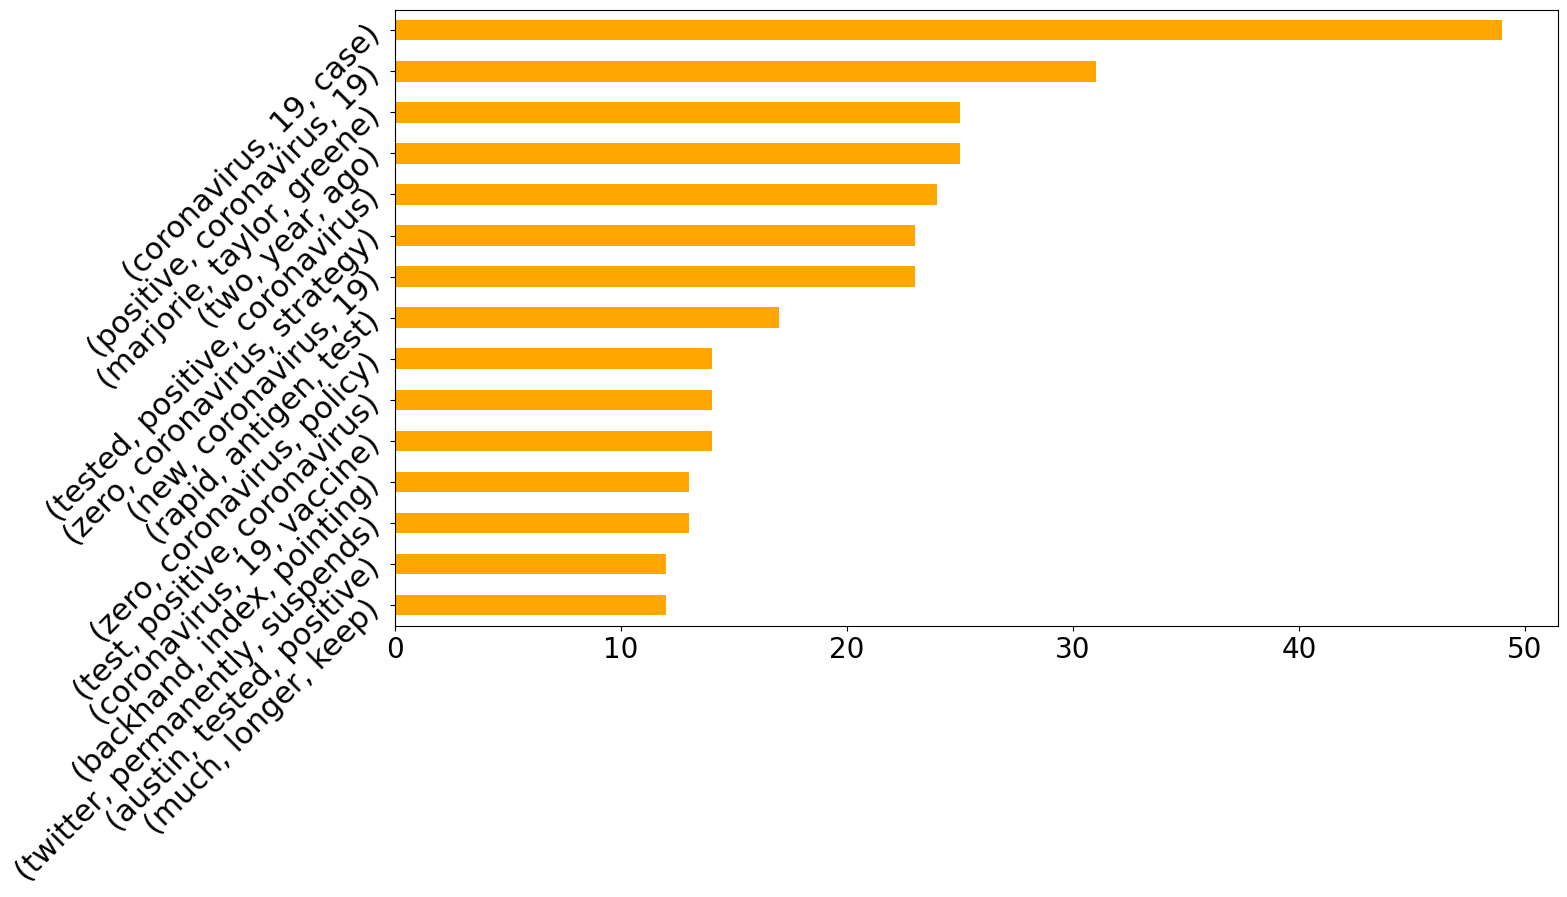

In [37]:
plot_ngrams_for_dataset1(df, 'Overall Dataset', '2020-04-01', '2020-06-30', n=[2, 3], top=15)

plot_ngrams_for_dataset1(df, 'Overall Dataset', '2020-07-01', '2020-09-30', n=[2, 3], top=15)

plot_ngrams_for_dataset1(df, 'Overall Dataset', '2020-10-01', '2020-12-31', n=[2, 3], top=15)

plot_ngrams_for_dataset1(df, 'Overall Dataset', '2021-01-01', '2021-03-31', n=[2, 3], top=15)

plot_ngrams_for_dataset1(df, 'Overall Dataset', '2021-04-01', '2021-06-30', n=[2, 3], top=15)

plot_ngrams_for_dataset1(df, 'Overall Dataset', '2021-07-01', '2021-09-30', n=[2, 3], top=15)

plot_ngrams_for_dataset1(df, 'Overall Dataset', '2021-10-01', '2021-12-31', n=[2, 3], top=15)

plot_ngrams_for_dataset1(df, 'Overall Dataset', '2022-01-01', '2022-01-31', n=[2, 3], top=15)
